In [121]:
import numpy as np
import pandas as pd

from scipy.stats import shapiro, kstest, mannwhitneyu, chi2_contingency, kruskal
from statsmodels.stats.anova import AnovaRM
import scipy

import seaborn as sb

from itertools import combinations, product
from math import sqrt

# Data import

In [122]:
df_total = pd.read_csv("total.csv")
print(df_total.columns)
print(len(df_total))
df_total.sample(100).head()

Index(['id', 'Filename', 'Account', 'body', 'language', 'Hashtag', 'Sentiment',
       'Correlation_to_the_topic', 'Type_of_media_content',
       'Impression_or_Sentiment', 'Animals', 'Nature', 'People',
       'Natural_Disasters', 'Artifacts', 'Education_Facts_or_News', 'BERTopic',
       'platform', 'mean_h', 'mean_s', 'mean_v', 'dominant_h', 'dominant_s',
       'dominant_v', 'max_colorname'],
      dtype='object')
6905


,id,Filename,Account,body,language,Hashtag,Sentiment,Correlation_to_the_topic,Type_of_media_content,Impression_or_Sentiment,...,Education_Facts_or_News,BERTopic,platform,mean_h,mean_s,mean_v,dominant_h,dominant_s,dominant_v,max_colorname
2704,klimawandel_128,klimawandel_128.jpg,Terra X Nature,Wer hat an der Uhr gedreht? 🕚\nDas Zeitmanagem...,Language.GERMAN,klimawandel,neutral,True,Photo,Neutral,...,True,3_heat_record_temperatures_grad,instagram,0.578339,0.111651,0.547560,0.627451,0.105882,0.568627,violet
1655,klimakrise_459,klimakrise_459.jpg,Utopia,Die Klimakrise gefährdet uns alle. Doch Mensch...,Language.GERMAN,klimakrise,negative,True,Photo,Neutral,...,True,13_plastic_waste_plasticfree_savetheplanet,instagram,0.338523,0.151500,0.614829,0.156863,0.113725,0.564706,gray
5220,klimakrise_6990639277927386374,6990639277927386374.jpg,wwf_deutschland,"Wir müssen was tun, jetzt! Gegen die #klimakri...",Language.GERMAN,klimakrise,positive,True,Photo,Negative,...,True,10_meat_fleisch_vegan_dairy,tiktok,0.240519,0.131229,0.528584,0.333333,0.203922,0.325490,gray
5811,klimaschutz_7262773193000111392,7262773193000111392.jpg,newkidsmarlon,Schluckt nicht so viel!🤧 #vokuhila #spaß #unte...,Language.GERMAN,klimaschutz,neutral,True,Photo,Neutral,...,False,-1_klimawandel_klimaschutz_climatechange_klima...,tiktok,0.308054,0.222616,0.483302,0.054902,0.243137,0.564706,gray
2045,klimaschutz_159,klimaschutz_159.jpg,Deutschlandfunk Kultur,"🌱 So klang das schon in den Achtzigerjahren, a...",Language.GERMAN,klimaschutz,neutral,True,Drawing,Negative,...,True,-1_klimawandel_klimaschutz_climatechange_klima...,instagram,0.364856,0.199736,0.687559,0.470588,0.141176,0.827451,green-blue


In [123]:
df_colors = pd.read_csv("unified_color_data_birch.csv")
print(df_colors.columns)
print(df_colors["hashtag"].unique())
df_colors.sample(100).head()

Index(['Unnamed: 0', 'index', 'id', 'platform', 'hashtag', 'n_clusters',
       'mean_r', 'mean_g', 'mean_b', 'mean_h', 'mean_s', 'mean_v',
       'dominant_r', 'dominant_g', 'dominant_b', 'dominant_h', 'dominant_s',
       'dominant_v', 'black', 'gray', 'white', 'orange', 'orange-yellow',
       'yellow', 'yellow-green', 'green', 'green-blue', 'blue', 'blue-violet',
       'violet', 'violet-red', 'red', 'red-orange', 'max_colorname'],
      dtype='object')
['climatechange' 'climatecrisis' 'savetheplanet' 'klimakrise'
 'klimaschutz' 'klimawandel']


,Unnamed: 0,index,id,platform,hashtag,n_clusters,mean_r,mean_g,mean_b,mean_h,...,yellow-green,green,green-blue,blue,blue-violet,violet,violet-red,red,red-orange,max_colorname
5510,5510,0,klimaschutz_272.jpg,instagram,klimaschutz,5,0.678792,0.624320,0.671712,0.622751,...,0.0,0.000000,0.0,0.275965,0.198146,0.000000,0.0,0.0,0.385953,red-orange
6512,6512,0,klimawandel_587.jpg,instagram,klimawandel,13,0.354006,0.303016,0.264849,0.121545,...,0.0,0.005744,0.0,0.007889,0.020833,0.005668,0.0,0.0,0.000000,orange-yellow
3062,3062,0,climatechange_308.jpg,instagram,climatechange,1,0.228651,0.800573,0.988235,0.541176,...,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000,blue-violet
2678,2678,0,6985560831358405893,tiktok,klimawandel,9,0.117035,0.093240,0.069480,0.047418,...,0.0,0.000000,0.0,0.000000,0.000000,0.035916,0.0,0.0,0.000000,black
37,37,0,7229725636720446747,tiktok,climatechange,2,0.375914,0.600779,0.620501,0.484865,...,0.0,0.481158,0.0,0.000000,0.518842,0.000000,0.0,0.0,0.000000,blue-violet


In [124]:
# normalize ids
for idx, row  in df_colors.iterrows():
    id = row["id"]
    if id.endswith(".jpg"):
        newid = id.split('.')[0]
    else:
        newid = row["hashtag"] + "_" + id
    
    df_colors.at[idx, "id"] = newid
print(len(df_colors))
df_colors.sample(25).head()

6623


,Unnamed: 0,index,id,platform,hashtag,n_clusters,mean_r,mean_g,mean_b,mean_h,...,yellow-green,green,green-blue,blue,blue-violet,violet,violet-red,red,red-orange,max_colorname
5667,5667,0,klimaschutz_431,instagram,klimaschutz,12,0.581645,0.500996,0.480395,0.300388,...,0.000000,0.000000,0.000000,0.000000,0.171082,0.000000,0.0,0.000000,0.00000,orange
3942,3942,0,climatecrisis_614,instagram,climatecrisis,4,0.549297,0.600991,0.409573,0.349609,...,0.523655,0.000000,0.097331,0.000000,0.000000,0.000000,0.0,0.000000,0.17372,yellow-green
1506,1506,0,klimakrise_7251286524472429850,tiktok,klimakrise,11,0.238687,0.225980,0.206330,0.053355,...,0.000000,0.000000,0.000000,0.000000,0.012370,0.000000,0.0,0.000000,0.00000,black
1232,1232,0,savetheplanet_7102067510656159019,tiktok,savetheplanet,2,0.493842,0.493842,0.493842,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,gray
5368,5368,0,klimaschutz_129,instagram,klimaschutz,9,0.254231,0.375841,0.412582,0.476084,...,0.000000,0.034314,0.000000,0.043045,0.387638,0.084406,0.0,0.059972,0.00000,gray


In [125]:
df_complete = pd.merge(df_total, df_colors, on="id")
print(df_complete.columns)
print(len(df_complete))
print(df_complete["Hashtag"].unique())
df_complete.head()

Index(['id', 'Filename', 'Account', 'body', 'language', 'Hashtag', 'Sentiment',
       'Correlation_to_the_topic', 'Type_of_media_content',
       'Impression_or_Sentiment', 'Animals', 'Nature', 'People',
       'Natural_Disasters', 'Artifacts', 'Education_Facts_or_News', 'BERTopic',
       'platform_x', 'mean_h_x', 'mean_s_x', 'mean_v_x', 'dominant_h_x',
       'dominant_s_x', 'dominant_v_x', 'max_colorname_x', 'Unnamed: 0',
       'index', 'platform_y', 'hashtag', 'n_clusters', 'mean_r', 'mean_g',
       'mean_b', 'mean_h_y', 'mean_s_y', 'mean_v_y', 'dominant_r',
       'dominant_g', 'dominant_b', 'dominant_h_y', 'dominant_s_y',
       'dominant_v_y', 'black', 'gray', 'white', 'orange', 'orange-yellow',
       'yellow', 'yellow-green', 'green', 'green-blue', 'blue', 'blue-violet',
       'violet', 'violet-red', 'red', 'red-orange', 'max_colorname_y'],
      dtype='object')
6623
['climatechange' 'climatecrisis' 'klimakrise' 'klimaschutz' 'klimawandel'
 'savetheplanet']


,id,Filename,Account,body,language,Hashtag,Sentiment,Correlation_to_the_topic,Type_of_media_content,Impression_or_Sentiment,...,yellow-green,green,green-blue,blue,blue-violet,violet,violet-red,red,red-orange,max_colorname_y
0,climatechange_1,climatechange_1.jpg,NASA Earth,Not your typical ice cube. 🧊\n\nAlthough it is...,Language.ENGLISH,climatechange,neutral,True,Photo,Neutral,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,gray
1,climatechange_2,climatechange_2.jpg,NASA,Not your typical ice cube. 🧊\n\nAlthough it is...,Language.ENGLISH,climatechange,neutral,True,Photo,Neutral,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,gray
2,climatechange_3,climatechange_3.jpg,Pubity,2023 will be the hottest year recorded in hist...,Language.ENGLISH,climatechange,positive,True,Text,Negative,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,orange
3,climatechange_4,climatechange_4.jpg,MEMEZAR • MEMES & MEME-CULTURE,I just know someone would try drinking them to...,Language.ENGLISH,climatechange,neutral,True,Photo,Neutral,...,0.060279,0.028799,0.0,0.0,0.000000,0.0,0.0,0.0,0.000077,white
4,climatechange_5,climatechange_5.jpg,Pubity,"According to one professor, we can stop global...",Language.ENGLISH,climatechange,positive,True,Photo,Neutral,...,0.000000,0.008425,0.0,0.0,0.036305,0.0,0.0,0.0,0.000000,gray


In [126]:
#define colornames
colornames = ['black', 'gray', 'white', 'orange', 'orange-yellow',
       'yellow', 'yellow-green', 'green', 'green-blue', 'blue', 'blue-violet',
       'violet', 'violet-red', 'red', 'red-orange']

colors_to_colornames = {
       'black':(0.066,0.066,0.066),
       'gray':(0.466,0.466,0.466),
       'white':(0.943,0.943,0.943), 
       'orange': (0.997, 0.009, 0.391), 
       'orange-yellow': (0.998,0.256,0.01),
       'yellow': (0.994,0.691,0.03), 
       'yellow-green': (0.798,0.873,0.014), 
       'green': (0.028, 0.566, 0.047), 
       'green-blue':(0.019, 0.555,0.406), 
       'blue': (0.001,0.67,0.663), 
       'blue-violet':(0.065,0.657,0.788),
       'violet': (0.002,0.627,0.939), 
       'violet-red':(0.207,0.44,0.995), 
       'red':(0.731, 0.15,0.998), 
       'red-orange': (0.873, 0.003, 0.618)
}

# Visualizations

In [127]:
num_total = len(df_total)
num_insta = len(df_total.loc[df_total["platform"] == "instagram"])
num_tiktok = len(df_total.loc[df_total["platform"] == "tiktok"])

print(f"We have {num_total} posts, of which {num_insta} are from Instagram and {num_tiktok} are from Tiktok.")

We have 6905 posts, of which 3802 are from Instagram and 3103 are from Tiktok.


C:\Users\Maxim\AppData\Local\Temp\ipykernel_54284\1756337994.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p.set_xticklabels(colornames, rotation=90)


[Text(0, 0, 'black'),
 Text(1, 0, 'gray'),
 Text(2, 0, 'white'),
 Text(3, 0, 'orange'),
 Text(4, 0, 'orange-yellow'),
 Text(5, 0, 'yellow'),
 Text(6, 0, 'yellow-green'),
 Text(7, 0, 'green'),
 Text(8, 0, 'green-blue'),
 Text(9, 0, 'blue'),
 Text(10, 0, 'blue-violet'),
 Text(11, 0, 'violet'),
 Text(12, 0, 'violet-red'),
 Text(13, 0, 'red'),
 Text(14, 0, 'red-orange')]

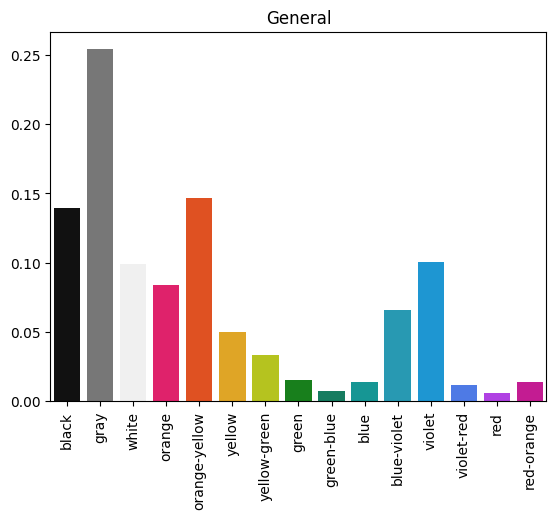

In [132]:
#for color in colornames:
    #sb.boxplot(df_complete[color], color=colors_to_colornames[color])
p=sb.barplot(df_complete[colornames], palette=colors_to_colornames, errorbar=None)
p.set(title="General")
p.set_xticklabels(colornames, rotation=90) 

#p_i=sb.barplot(df_complete.loc[df_complete["platform_x"] == "instagram"][colornames], palette=colors_to_colornames, errorbar=None)
#p_i.set(title="Instagram")
#p_i.set_xticklabels(colornames, rotation=90) 

#p_t=sb.barplot(df_complete.loc[df_complete["platform_x"] == "tiktok"][colornames], palette=colors_to_colornames, errorbar=None)
#p_t.set(title="Tiktok")
#p_t.set_xticklabels(colornames, rotation=90) 

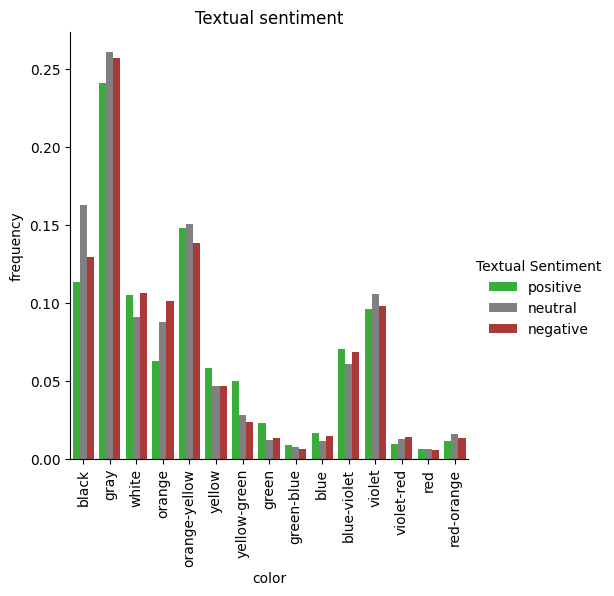

In [133]:

#p=sb.barplot(df_complete.loc[df_complete["Sentiment"]=="negative"][colornames], palette=colors_to_colornames, errorbar=None)
#p=sb.catplot(df_complete[colornames+["Sentiment"]], hue="Sentiment")
#for color in colornames:
#print(df_complete[colornames].melt())
sentiment_palette = {
    "negative": (0.75, 0.15, 0.15),
    "neutral": (0.50, 0.5, 0.5),
    "positive": (0.15, 0.75, 0.15)
}
iv = "Sentiment"
df_catplot = pd.DataFrame(columns=["color", "frequency", "Textual Sentiment"])
for idx, row in df_complete.iterrows():
    for color in colornames:
        new_row = pd.DataFrame({"color":[color], "frequency":[row[color]], "Textual Sentiment":[row[iv]]})
        df_catplot = pd.concat((df_catplot, new_row))
p=sb.catplot(df_catplot, x="color", y="frequency",hue="Textual Sentiment",  kind="bar", palette=sentiment_palette, errorbar=None, hue_order=["positive", "neutral", "negative"])#, showfliers=False)
p.set(title="Textual sentiment")
p.set_xticklabels(colornames, rotation=90) 

## Platform differences

In [10]:
insta_plot_color = (245/255, 133/255, 41/255)
tiktok_plot_color = (238/255, 29/255, 82/255)

In [11]:
df_instagram = df_total.loc[df_total["platform"] == "instagram"]
df_tiktok = df_total.loc[df_total["platform"] == "tiktok"]

print(df_instagram)
print(df_tiktok)

df_c_instagram = df_colors.loc[df_colors["platform"] == "instagram"]
df_c_tiktok = df_colors.loc[df_colors["platform"] == "tiktok"]

                     id               Filename  \
0       climatechange_1    climatechange_1.jpg   
1       climatechange_2    climatechange_2.jpg   
2       climatechange_3    climatechange_3.jpg   
3       climatechange_4    climatechange_4.jpg   
4       climatechange_5    climatechange_5.jpg   
...                 ...                    ...   
3797  savetheplanet_696  savetheplanet_696.jpg   
3798  savetheplanet_697  savetheplanet_697.jpg   
3799  savetheplanet_698  savetheplanet_698.jpg   
3800  savetheplanet_699  savetheplanet_699.jpg   
3801  savetheplanet_700  savetheplanet_700.jpg   

                             Account  \
0                         NASA Earth   
1                               NASA   
2                             Pubity   
3     MEMEZAR • MEMES & MEME-CULTURE   
4                             Pubity   
...                              ...   
3797                 Snap_Sri _Lanka   
3798         The Undisputable Vegans   
3799         The Undisputable Vegans   

### Computing average RGB values for each platform

In [12]:
mean_r_ig = np.mean(df_c_instagram.dropna()["mean_r"]) * 255
mean_g_ig = np.mean(df_c_instagram.dropna()["mean_g"]) * 255
mean_b_ig = np.mean(df_c_instagram.dropna()["mean_b"]) * 255

mean_r_tt = np.mean(df_c_tiktok.dropna()["mean_r"]) * 255
mean_g_tt = np.mean(df_c_tiktok.dropna()["mean_g"]) * 255
mean_b_tt = np.mean(df_c_tiktok.dropna()["mean_b"]) * 255

print(f"MEAN RGB INSTA: {mean_r_ig}, {mean_g_ig}, {mean_b_ig}")
print(f"MEAN RGB TIKTOK: {mean_r_tt}, {mean_g_tt}, {mean_b_tt}")

MEAN RGB INSTA: 130.67807328377359, 128.55029756432108, 123.905406390105
MEAN RGB TIKTOK: 121.06877198857114, 112.35083661099353, 110.6472009513286


### Comparing average h, s, v values between platforms

Mean H Instagram: 0.3269368464141073
Mean H Tiktok: 0.3638275599344696
Effect size: 0.06161344241577582


MannwhitneyuResult(statistic=5015054.0, pvalue=1.7808711859184778e-05)

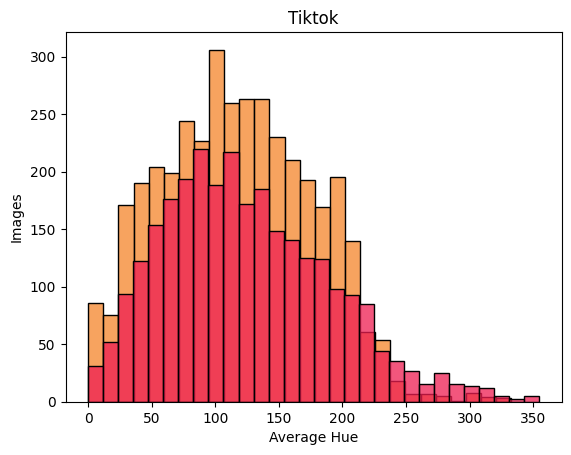

In [13]:
total_mean_h = df_total.dropna()["mean_h"]
instagram_mean_h = df_instagram.dropna()["mean_h"]
tiktok_mean_h = df_tiktok.dropna()["mean_h"]

sb.histplot(instagram_mean_h*360%360, color=insta_plot_color, binwidth=12).set(title='Instagram',xlabel='Average Hue', ylabel="Images")
sb.histplot(tiktok_mean_h*360%360, color=tiktok_plot_color, binwidth=12).set(title='Tiktok',xlabel='Average Hue', ylabel="Images")
print(f"Mean H Instagram: {np.mean(instagram_mean_h)}")
print(f"Mean H Tiktok: {np.mean(tiktok_mean_h)}")

res = mannwhitneyu(instagram_mean_h, tiktok_mean_h)
mwu_stat = res.statistic
p = res.pvalue
effect_size = 1- (2*mwu_stat)/(len(instagram_mean_h) * len(tiktok_mean_h))
print(f"Effect size: {effect_size}")
res

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)
p=0.0
KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)
p=0.0
Mean S Instagram: 0.3111618243426425
Mean S Tiktok: 0.30379354053769997
Effect size: -0.033714378415881985


MannwhitneyuResult(statistic=5524518.0, pvalue=0.01888214367296466)

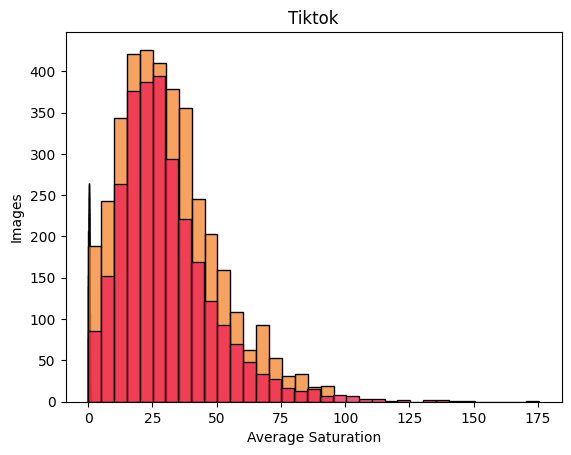

In [14]:
total_mean_s = df_total.dropna()["mean_s"]
instagram_mean_s = df_instagram.dropna()["mean_s"]
tiktok_mean_s = df_tiktok.dropna()["mean_s"]

insta_s_res_normal = kstest(instagram_mean_s, "norm")
print(insta_s_res_normal)
print(f"p={insta_s_res_normal.pvalue}")
sb.histplot(instagram_mean_s, color=insta_plot_color)


tok_s_res_normal = kstest(tiktok_mean_s, "norm")
print(tok_s_res_normal)
print(f"p={tok_s_res_normal.pvalue}")
sb.histplot(instagram_mean_s*100, color=insta_plot_color, binwidth=5).set(title='Instagram',xlabel='Average Saturation', ylabel="Images")
sb.histplot(tiktok_mean_s*100, color=tiktok_plot_color, binwidth=5).set(title='Tiktok',xlabel='Average Saturation', ylabel="Images")


print(f"Mean S Instagram: {np.mean(instagram_mean_s)}")
print(f"Mean S Tiktok: {np.mean(tiktok_mean_s)}")

res = mannwhitneyu(instagram_mean_s, tiktok_mean_s)
mwu_stat = res.statistic
p = res.pvalue

effect_size = 1- (2*mwu_stat)/(len(instagram_mean_s) * len(tiktok_mean_s))
print(f"Effect size: {effect_size}")
res

Mean V Instagram: 0.5857678035515773
Mean V Tiktok: 0.5272415773838669
Effect size: -0.2001465289333364


MannwhitneyuResult(statistic=6413987.5, pvalue=3.716348002610858e-44)

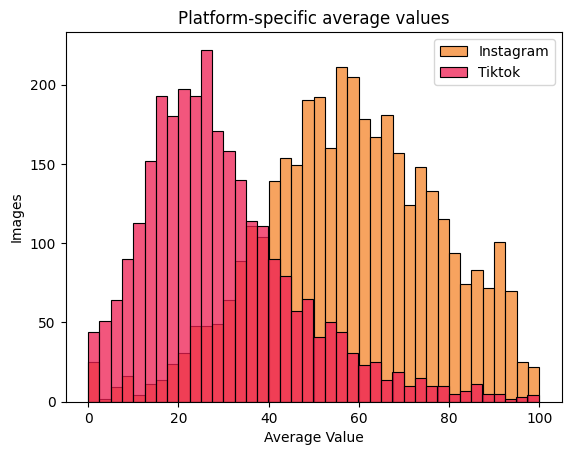

In [15]:
total_mean_v = df_total.dropna()["mean_v"]
instagram_mean_v = df_instagram.dropna()["mean_v"]
tiktok_mean_v = df_tiktok.dropna()["mean_v"]

print(f"Mean V Instagram: {np.mean(instagram_mean_v)}")
print(f"Mean V Tiktok: {np.mean(tiktok_mean_v)}")

sb.histplot(instagram_mean_v*100%100, color=insta_plot_color, binwidth=2.5).set(title='Instagram',xlabel='Average Value', ylabel="Images")
p=sb.histplot(tiktok_mean_s*100%100, color=tiktok_plot_color, binwidth=2.5, legend=True)
p.set(title='Platform-specific average values',xlabel='Average Value', ylabel="Images")
p.legend(labels=[ "Instagram","Tiktok"])


res = mannwhitneyu(instagram_mean_v, tiktok_mean_v)
mwu_stat = res.statistic
p = res.pvalue

effect_size = 1- (2*mwu_stat)/(len(instagram_mean_v) * len(tiktok_mean_v))
print(f"Effect size: {effect_size}")
res

### Comparing h, s, v values of dominant colors in an image between platforms

#### Hue

Mean Dom H Instagram: 0.30541761655888294
Mean Dom H Tiktok: 0.2725789393117076
Effect size: -0.07681673142992285


MannwhitneyuResult(statistic=5754871.5, pvalue=7.892374912495207e-08)

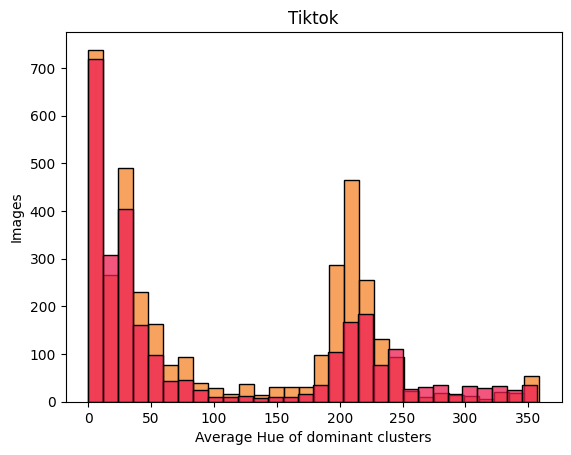

In [16]:
total_dom_h = df_total.dropna()["dominant_h"]
instagram_dom_h = df_instagram.dropna()["dominant_h"]
tiktok_dom_h = df_tiktok.dropna()["dominant_h"]

#insta_h_res_normal = kstest(instagram_mean_s, "norm")
#print(insta_s_res_normal)

#tok_s_res_normal = kstest(tiktok_mean_s, "norm")
#print(tok_s_res_normal)
sb.histplot(instagram_dom_h*360%360, color=insta_plot_color, binwidth=12).set(title='Instagram',xlabel='Average Hue of dominant clusters', ylabel="Images")
sb.histplot(tiktok_dom_h*360%360, color=tiktok_plot_color, binwidth=12).set(title='Tiktok',xlabel='Average Hue of dominant clusters', ylabel="Images")


print(f"Mean Dom H Instagram: {np.mean(instagram_dom_h)}")
print(f"Mean Dom H Tiktok: {np.mean(tiktok_dom_h)}")

res = mannwhitneyu(instagram_dom_h, tiktok_dom_h)
mwu_stat = res.statistic
p = res.pvalue

effect_size = 1- (2*mwu_stat)/(len(instagram_dom_h) * len(tiktok_dom_h))
print(f"Effect size: {effect_size}")
res

#### Saturation

Mean Dom S Instagram: 0.2956188644717048
Mean Dom S Tiktok: 0.24472508662797976
Effect size: -0.0771053546960081


MannwhitneyuResult(statistic=5756414.0, pvalue=7.118498304710409e-08)

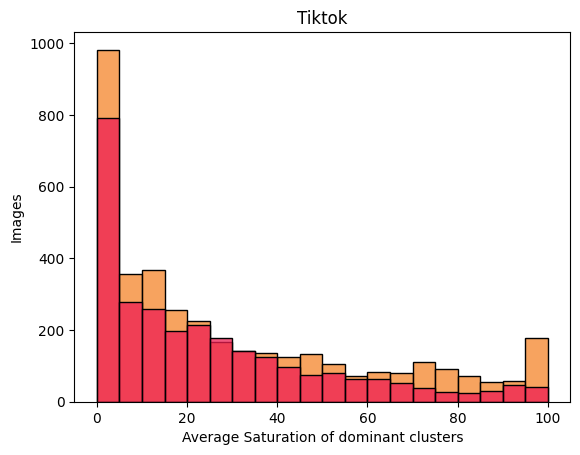

In [17]:
total_dom_s = df_total.dropna()["dominant_s"]
instagram_dom_s = df_instagram.dropna()["dominant_s"]
tiktok_dom_s = df_tiktok.dropna()["dominant_s"]

#insta_h_res_normal = kstest(instagram_mean_s, "norm")
#print(insta_s_res_normal)
#tok_s_res_normal = kstest(tiktok_mean_s, "norm")
#print(tok_s_res_normal)
sb.histplot(instagram_dom_s*100, color=insta_plot_color, binwidth=5).set(title='Instagram',xlabel='Average Saturation of dominant clusters', ylabel="Images")
sb.histplot(tiktok_dom_s*100, color=tiktok_plot_color, binwidth=5).set(title='Tiktok',xlabel='Average Saturation of dominant clusters', ylabel="Images")


print(f"Mean Dom S Instagram: {np.mean(instagram_dom_s)}")
print(f"Mean Dom S Tiktok: {np.mean(tiktok_dom_s)}")

res = mannwhitneyu(instagram_dom_s, tiktok_dom_s)
mwu_stat = res.statistic
p = res.pvalue

effect_size = 1- (2*mwu_stat)/(len(instagram_dom_s) * len(tiktok_dom_s))
print(f"Effect size: {effect_size}")
res

#### Value

Mean Dom V Instagram: 0.6140811505197914
Mean Dom V Tiktok: 0.4674452747742105
Effect size: -0.26752111627691133


MannwhitneyuResult(statistic=6774060.0, pvalue=1.5476351480870233e-77)

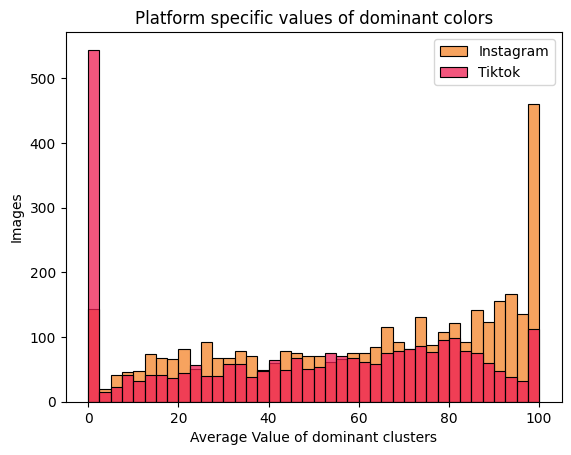

In [18]:
total_dom_v = df_total.dropna()["dominant_v"]
instagram_dom_v = df_instagram.dropna()["dominant_v"]
tiktok_dom_v = df_tiktok.dropna()["dominant_v"]

#insta_h_res_normal = kstest(instagram_mean_s, "norm")
#print(insta_s_res_normal)
#tok_s_res_normal = kstest(tiktok_mean_s, "norm")
#print(tok_s_res_normal)
sb.histplot(instagram_dom_v*100, color=insta_plot_color, binwidth=2.5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
p = sb.histplot(tiktok_dom_v*100, color=tiktok_plot_color, binwidth=2.5)

p.set(title='Platform specific values of dominant colors',xlabel='Average Value of dominant clusters', ylabel="Images")
p.legend(labels=[ "Instagram","Tiktok"])


print(f"Mean Dom V Instagram: {np.mean(instagram_dom_v)}")
print(f"Mean Dom V Tiktok: {np.mean(tiktok_dom_v)}")

res = mannwhitneyu(instagram_dom_v, tiktok_dom_v)
mwu_stat = res.statistic
p = res.pvalue

effect_size = 1- (2*mwu_stat)/(len(instagram_dom_v) * len(tiktok_dom_v))
print(f"Effect size: {effect_size}")
res

### Comparing frequency of color names between platforms (unfinished)

In [19]:
# first, make contingency table
instagram_dominant_colornames = df_instagram["max_colorname"]
tiktok_dominant_colornames = df_tiktok["max_colorname"]

platform_colorname_contingency_table = pd.crosstab(index=df_total["platform"], columns=df_total["max_colorname"])
platform_colorname_contingency_table

max_colorname,black,blue,blue-violet,gray,green,green-blue,orange,orange-yellow,red,red-orange,violet,violet-red,white,yellow,yellow-green
platform,,,,,,,,,,,,,,,
instagram,328,58,311,988,65,34,195,478,12,23,397,20,583,169,141
tiktok,665,18,103,745,20,9,176,487,11,26,224,30,105,127,75


In [20]:
#perform chi squared test of independence
res = chi2_contingency(platform_colorname_contingency_table, correction=False)
sample_size = platform_colorname_contingency_table.sum().sum()
print(sample_size)
cramers_V = sqrt((res.statistic/sample_size))
print(cramers_V)
res

6623
0.2983906636889709


Chi2ContingencyResult(statistic=589.691972694579, pvalue=8.301409034363869e-117, dof=14, expected_freq=array([[570.04167296,  43.62856711, 237.66087876, 994.84614223,
         48.79510796,  24.68458403, 212.97629473, 553.96799034,
         13.20338215,  28.12894459, 356.49131813,  28.70300468,
        394.95334441, 169.92178771, 123.99698022],
       [422.95832704,  32.37143289, 176.33912124, 738.15385777,
         36.20489204,  18.31541597, 158.02370527, 411.03200966,
          9.79661785,  20.87105541, 264.50868187,  21.29699532,
        293.04665559, 126.07821229,  92.00301978]]))

In [21]:
#chi-squared post-hoc test
#https://neuhofmo.github.io/chi-square-and-post-hoc-in-python/
#thank you for letting me steal your code

# gathering all combinations for post-hoc chi2
all_combinations = list(product(platform_colorname_contingency_table.index, platform_colorname_contingency_table.columns))
print(all_combinations)
print("Significance results:")
for comb in all_combinations:
    # subset df into a dataframe containing only the pair "comb"
    new_df = platform_colorname_contingency_table[(platform_colorname_contingency_table.index == comb[0]) | (platform_colorname_contingency_table.index == comb[1])]
    # running chi2 test
    chi2, p, dof, ex = chi2_contingency(new_df, correction=False)
    print(f"Chi2 result for pair {comb}: {chi2}, p-value: {p}")


[('instagram', 'black'), ('instagram', 'blue'), ('instagram', 'blue-violet'), ('instagram', 'gray'), ('instagram', 'green'), ('instagram', 'green-blue'), ('instagram', 'orange'), ('instagram', 'orange-yellow'), ('instagram', 'red'), ('instagram', 'red-orange'), ('instagram', 'violet'), ('instagram', 'violet-red'), ('instagram', 'white'), ('instagram', 'yellow'), ('instagram', 'yellow-green'), ('tiktok', 'black'), ('tiktok', 'blue'), ('tiktok', 'blue-violet'), ('tiktok', 'gray'), ('tiktok', 'green'), ('tiktok', 'green-blue'), ('tiktok', 'orange'), ('tiktok', 'orange-yellow'), ('tiktok', 'red'), ('tiktok', 'red-orange'), ('tiktok', 'violet'), ('tiktok', 'violet-red'), ('tiktok', 'white'), ('tiktok', 'yellow'), ('tiktok', 'yellow-green')]
Significance results:
Chi2 result for pair ('instagram', 'black'): 0.0, p-value: 1.0
Chi2 result for pair ('instagram', 'blue'): 0.0, p-value: 1.0
Chi2 result for pair ('instagram', 'blue-violet'): 0.0, p-value: 1.0
Chi2 result for pair ('instagram', 'gr

#### Mean RGB colors for each platform

In [25]:
mean_r_ig = np.mean(df_c_instagram.dropna()["mean_r"]) * 255
mean_g_ig = np.mean(df_c_instagram.dropna()["mean_g"]) * 255
mean_b_ig = np.mean(df_c_instagram.dropna()["mean_b"]) * 255

mean_r_tt = np.mean(df_c_tiktok.dropna()["mean_r"]) * 255
mean_g_tt = np.mean(df_c_tiktok.dropna()["mean_g"]) * 255
mean_b_tt = np.mean(df_c_tiktok.dropna()["mean_b"]) * 255

print(f"MEAN RGB INSTA: {mean_r_ig}, {mean_g_ig}, {mean_b_ig}")
print(f"MEAN RGB TIKTOK: {mean_r_tt}, {mean_g_tt}, {mean_b_tt}")

MEAN RGB INSTA: 130.67807328377359, 128.55029756432108, 123.905406390105
MEAN RGB TIKTOK: 121.06877198857114, 112.35083661099353, 110.6472009513286


## Sentiment

### Comparing average h, s, v values of posts with positive, negative, or neutral *textual* sentiment

In [22]:
print(df_total["Sentiment"].unique())

df_t_positive = df_total.loc[df_total["Sentiment"] == "positive"]
df_t_neutral = df_total.loc[df_total["Sentiment"] == "neutral"]
df_t_negative = df_total.loc[df_total["Sentiment"] == "negative"]

['neutral' 'positive' 'negative']


#### Hue

2       0.064709
4       0.110547
10      0.523036
14      0.361116
15      0.312974
          ...   
6886    0.320867
6889    0.136219
6899    0.429402
6902    0.168220
6903    0.266041
Name: mean_h, Length: 1941, dtype: float64


KruskalResult(statistic=5.037937042890183, pvalue=0.08054264192557052)
Mean positive 0.33247848551133646
Mean neutral 0.3504892025424065
Mean negative 0.33914785315600354


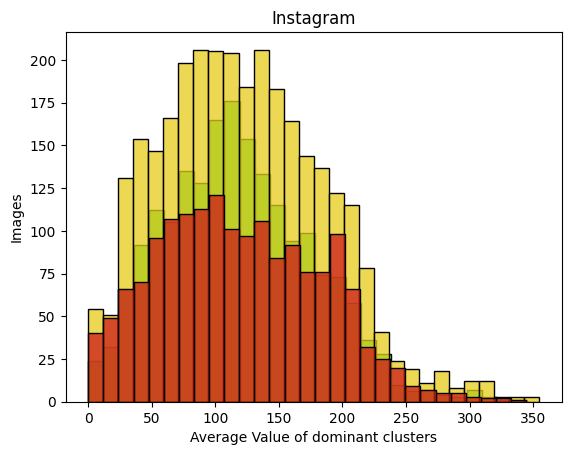

In [23]:
mean_h_pos_t = df_t_positive["mean_h"].dropna()
mean_h_neu_t = df_t_neutral["mean_h"].dropna()
mean_h_neg_t = df_t_negative["mean_h"].dropna()
print(mean_h_pos_t)
sb.histplot(mean_h_pos_t*360%360, color=(0.1,0.8,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_h_neu_t*360%360, color=(0.9,0.8,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_h_neg_t*360%360, color=(0.8,0.1,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")

res = kruskal(mean_h_pos_t, mean_h_neu_t, mean_h_neg_t)
print(res)

print(f"Mean positive {np.mean(mean_h_pos_t)}")
print(f"Mean neutral {np.mean(mean_h_neu_t)}")
print(f"Mean negative {np.mean(mean_h_neg_t)}")


#### Saturation

2       0.064709
4       0.110547
10      0.523036
14      0.361116
15      0.312974
          ...   
6886    0.320867
6889    0.136219
6899    0.429402
6902    0.168220
6903    0.266041
Name: mean_h, Length: 1941, dtype: float64
Kruskal-Wallis for all KruskalResult(statistic=6.039894281280925, pvalue=0.04880379803133947)
Main effect size: 0.0009119574635785784
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=3034351.5, pvalue=0.014394845421779339)
Effect size pos-neu: -0.041154106069098306
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=2570740.5, pvalue=0.26232692721363293)
Effect size neg-neu: -0.019722981009461016
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1664459.5, pvalue=0.2645189986377705)
Effect size pos-neg: -0.021473246354104747
Mean for positive : 0.3133710260293308
Mean for neutral : 0.3036888144559103
Mean for negative : 0.3094462374866689


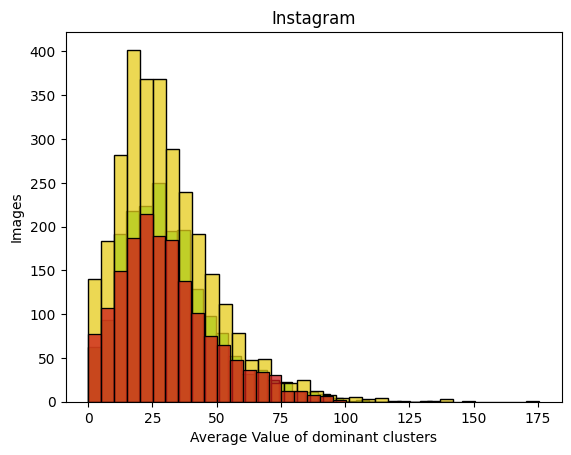

In [24]:
mean_s_pos_t = df_t_positive["mean_s"].dropna()
mean_s_neu_t = df_t_neutral["mean_s"].dropna()
mean_s_neg_t = df_t_negative["mean_s"].dropna()
print(mean_h_pos_t)
sb.histplot(mean_s_pos_t*100, color=(0.1,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_s_neu_t*100, color=(0.9,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_s_neg_t*100, color=(0.8,0.1,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
res = kruskal(mean_s_pos_t, mean_s_neu_t, mean_s_neg_t)
print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (len(df_total["mean_s"].dropna()-1))
print(f"Main effect size: {eps}")

res_pos_neu = mannwhitneyu(mean_s_pos_t, mean_s_neu_t)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(mean_s_pos_t) * len(mean_s_neu_t))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(mean_s_neg_t, mean_s_neu_t)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_neg_neu = 1- (2*res_neg_neu.statistic)/(len(mean_s_neg_t) * len(mean_s_neu_t))
print(f"Effect size neg-neu: {effect_size_neg_neu}")

res_pos_neg = mannwhitneyu(mean_s_pos_t, mean_s_neg_t)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(mean_s_pos_t) * len(mean_s_neg_t))
print(f"Effect size pos-neg: {effect_size_pos_neg}")



print(f"Mean for positive : {np.mean(mean_s_pos_t)}")
print(f"Mean for neutral : {np.mean(mean_s_neu_t)}")
print(f"Mean for negative : {np.mean(mean_s_neg_t)}")


#### Value

2       0.064709
4       0.110547
10      0.523036
14      0.361116
15      0.312974
          ...   
6886    0.320867
6889    0.136219
6899    0.429402
6902    0.168220
6903    0.266041
Name: mean_h, Length: 1941, dtype: float64
Kruskal-Wallis for all KruskalResult(statistic=11.87280949961232, pvalue=0.0026415094871062527)
epsilon=0.0017926633700154492
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=3043405.5, pvalue=0.008488538454560737)
Effect size pos-neu: -0.04426073668732089
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=2656305.5, pvalue=0.0022894748897582407)
Effect size pos-neu: -0.05366362841050165
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1614460.5, pvalue=0.632220975407112)
Effect size pos-neu: 0.009210973264611622
Mean for positive : 0.5625949421846337
Mean for neutral : 0.5552625144406407
Mean for negative : 0.5683557626660949


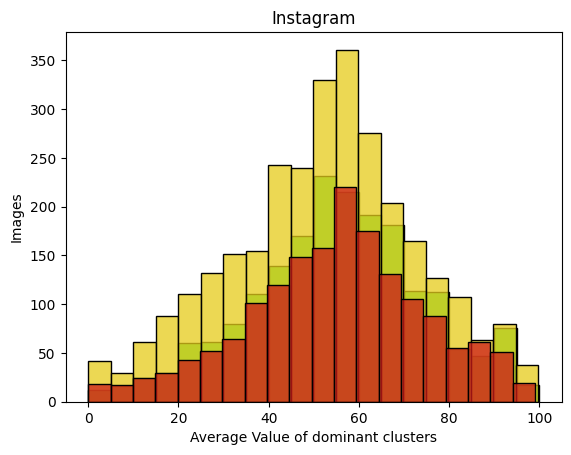

In [26]:
mean_v_pos_t = df_t_positive["mean_v"].dropna()
mean_v_neu_t = df_t_neutral["mean_v"].dropna()
mean_v_neg_t = df_t_negative["mean_v"].dropna()
print(mean_h_pos_t)
sb.histplot(mean_v_pos_t*100%100, color=(0.1,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_v_neu_t*100%100, color=(0.9,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_v_neg_t*100%100, color=(0.8,0.1,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
res = kruskal(mean_v_pos_t, mean_v_neu_t, mean_v_neg_t)
print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (len(df_total["mean_v"].dropna()-1))
print(f"epsilon={eps}")


res_pos_neu = mannwhitneyu(mean_v_pos_t, mean_v_neu_t)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(mean_v_pos_t) * len(mean_v_neu_t))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(mean_v_neg_t, mean_v_neu_t)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_neg_neu = 1- (2*res_neg_neu.statistic)/(len(mean_v_neg_t) * len(mean_v_neu_t))
print(f"Effect size pos-neu: {effect_size_neg_neu}")

res_pos_neg = mannwhitneyu(mean_v_pos_t, mean_v_neg_t)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(mean_v_pos_t) * len(mean_v_neg_t))
print(f"Effect size pos-neu: {effect_size_pos_neg}")


print(f"Mean for positive : {np.mean(mean_v_pos_t)}")
print(f"Mean for neutral : {np.mean(mean_v_neu_t)}")
print(f"Mean for negative : {np.mean(mean_v_neg_t)}")

### Comparing dominant h, s, v values of posts with positive, negative, or neutral *textual* sentiment

#### Hue

2       0.064709
4       0.110547
10      0.523036
14      0.361116
15      0.312974
          ...   
6886    0.320867
6889    0.136219
6899    0.429402
6902    0.168220
6903    0.266041
Name: mean_h, Length: 1941, dtype: float64
KruskalResult(statistic=4.835047980062101, pvalue=0.08914206106833612)
Mean positive: 0.2956773848127607
Mean neutral: 0.28885363003010056
Mean negative: 0.29001856847563323


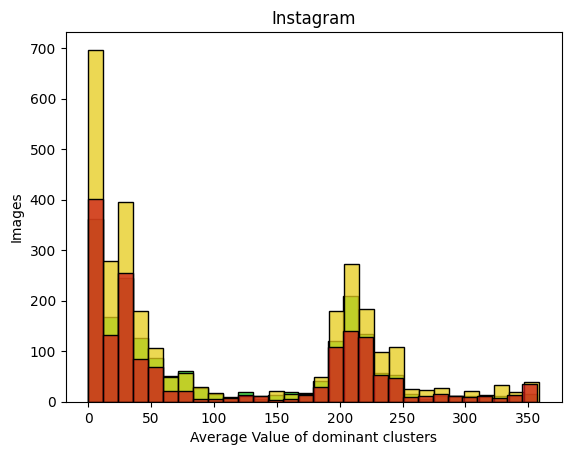

In [27]:
dom_h_pos_t = df_t_positive["dominant_h"].dropna()
dom_h_neu_t = df_t_neutral["dominant_h"].dropna()
dom_h_neg_t = df_t_negative["dominant_h"].dropna()
print(mean_h_pos_t)
sb.histplot(dom_h_pos_t*360%360, color=(0.1,0.8,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_h_neu_t*360%360, color=(0.9,0.8,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_h_neg_t*360%360, color=(0.8,0.1,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")

res = kruskal(dom_h_pos_t, dom_h_neu_t, dom_h_neg_t)
print(res)

print(f"Mean positive: {np.mean(dom_h_pos_t)}")
print(f"Mean neutral: {np.mean(dom_h_neu_t)}")
print(f"Mean negative: {np.mean(dom_h_neg_t)}")


#### Saturation

Kruskal-Wallis for all KruskalResult(statistic=12.910952135647376, pvalue=0.0015718907767566688)
eps=0.0019494114654457762
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=3087306.0, pvalue=0.0004010977288033037)
Effect size pos-neu: -0.059323983589826046
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=2547868.5, pvalue=0.5433571414024427)
Effect size pos-neu: -0.01065045734491843
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1706209.0, pvalue=0.014104209223206408)
Effect size pos-neu: -0.04709477532411621
Mean for positive : 0.2924114313422432
Mean for neutral : 0.2619563443092855
Mean for negative : 0.27399712714150576


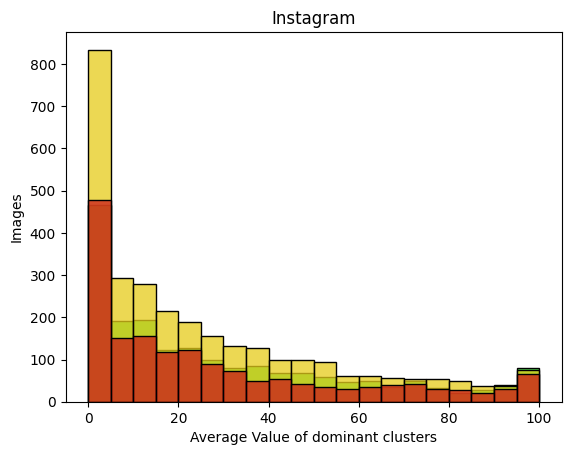

In [28]:
dom_s_pos_t = df_t_positive["dominant_s"].dropna()
dom_s_neu_t = df_t_neutral["dominant_s"].dropna()
dom_s_neg_t = df_t_negative["dominant_s"].dropna()
#print(mean_h_pos_t)
sb.histplot(dom_s_pos_t*100, color=(0.1,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_s_neu_t*100, color=(0.9,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_s_neg_t*100, color=(0.8,0.1,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
res = kruskal(dom_s_pos_t, dom_s_neu_t, dom_s_neg_t)
print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (len(df_total["dominant_s"].dropna()-1))
print(f"eps={eps}")


res_pos_neu = mannwhitneyu(dom_s_pos_t, dom_s_neu_t)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(dom_s_pos_t) * len(dom_s_neu_t))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(dom_s_neg_t, dom_s_neu_t)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_neg_neu = 1- (2*res_neg_neu.statistic)/(len(dom_s_neg_t) * len(dom_s_neu_t))
print(f"Effect size pos-neu: {effect_size_neg_neu}")

res_pos_neg = mannwhitneyu(dom_s_pos_t, dom_s_neg_t)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(dom_s_pos_t) * len(dom_s_neg_t))
print(f"Effect size pos-neu: {effect_size_pos_neg}")


print(f"Mean for positive : {np.mean(dom_s_pos_t)}")
print(f"Mean for neutral : {np.mean(dom_s_neu_t)}")
print(f"Mean for negative : {np.mean(dom_s_neg_t)}")

#### Value

Kruskal-Wallis for all KruskalResult(statistic=26.651289757467556, pvalue=1.632096980709164e-06)
eps=0.004024050997654772
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=3161096.5, pvalue=4.75927589579528e-07)
Effect size pos-neu: -0.08464316037731812
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=2652731.5, pvalue=0.00296424359523994)
Effect size pos-neu: -0.01065045734491843
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1681055.0, pvalue=0.0998578375621626)
Effect size pos-neu: -0.04709477532411621
Mean for positive : 0.577037306421796
Mean for neutral : 0.5306419071124954
Mean for negative : 0.5594915274030995


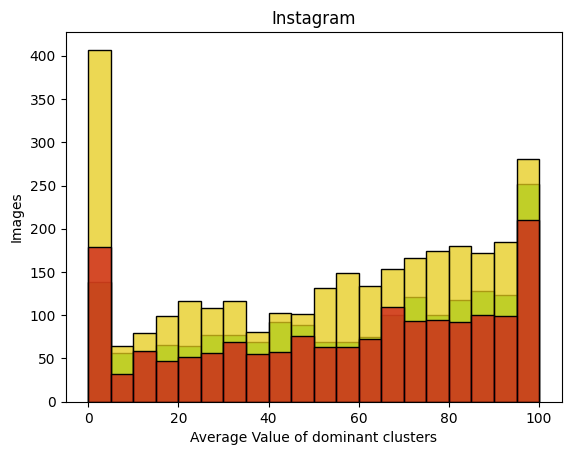

In [29]:
dom_v_pos_t = df_t_positive["dominant_v"].dropna()
dom_v_neu_t = df_t_neutral["dominant_v"].dropna()
dom_v_neg_t = df_t_negative["dominant_v"].dropna()
#print(mean_h_pos_t)
sb.histplot(dom_v_pos_t*100, color=(0.1,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_v_neu_t*100, color=(0.9,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_v_neg_t*100, color=(0.8,0.1,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
res = kruskal(dom_v_pos_t, dom_v_neu_t, dom_v_neg_t)
print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (len(df_total["dominant_v"].dropna()-1))
print(f"eps={eps}")

res_pos_neu = mannwhitneyu(dom_v_pos_t, dom_v_neu_t)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(dom_v_pos_t) * len(dom_v_neu_t))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(dom_v_neg_t, dom_v_neu_t)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_pos_neu = 1- (2*res_neg_neu.statistic)/(len(dom_v_neg_t) * len(dom_v_neu_t))
print(f"Effect size pos-neu: {effect_size_neg_neu}")

res_pos_neg = mannwhitneyu(dom_v_pos_t, dom_v_neg_t)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
effect_size_pos_neu = 1- (2*res_pos_neg.statistic)/(len(dom_v_pos_t) * len(dom_v_neg_t))
print(f"Effect size pos-neu: {effect_size_pos_neg}")

print(f"Mean for positive : {np.mean(dom_v_pos_t)}")
print(f"Mean for neutral : {np.mean(dom_v_neu_t)}")
print(f"Mean for negative : {np.mean(dom_v_neg_t)}")

### Comparing average h, s, v values of posts with positive, negative, or neutral *visual* sentiment

In [134]:
print(df_total["Impression_or_Sentiment"].unique())

df_v_positive = df_total.loc[df_total["Impression_or_Sentiment"] == "Positive"]
df_v_neutral = df_total.loc[df_total["Impression_or_Sentiment"] == "Neutral"]
df_v_negative = df_total.loc[df_total["Impression_or_Sentiment"] == "Negative"]

['Neutral' 'Negative' 'Positive' nan]


##### Hue

15      0.312974
19      0.183423
33      0.199648
37      0.245944
40      0.243355
          ...   
6869    0.344437
6886    0.320867
6887    0.523139
6889    0.136219
6900    0.326532
Name: mean_h, Length: 949, dtype: float64
Kruskal-Wallis for all KruskalResult(statistic=28.34837210565119, pvalue=6.98601014191948e-07)
eps=0.004110246789278119
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=1417170.0, pvalue=0.00014286893312603997)
Effect size pos-neu: 0.08102780254518926
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=3643831.5, pvalue=2.191687796798017e-06)
Effect size pos-neu: 0.032490909090909126
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1417170.0, pvalue=0.00014286893312603997)
Effect size pos-neu: -0.23415687674716312
Mean for positive : 118.54489135565726
Mean for neutral : 127.62940940525966
Mean for negative : 119.27909740820417


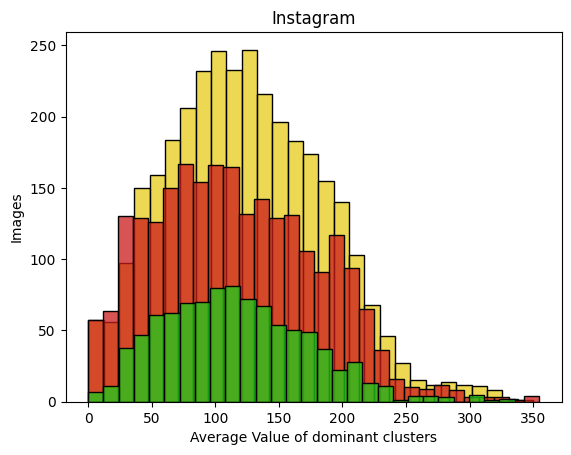

In [135]:
mean_h_pos_v = df_v_positive["mean_h"].dropna()
mean_h_neu_v = df_v_neutral["mean_h"].dropna()
mean_h_neg_v = df_v_negative["mean_h"].dropna()
print(mean_h_pos_v)
sb.histplot(mean_h_neu_v*360%360, color=(0.9,0.8,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_h_neg_v*360%360, color=(0.8,0.1,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_h_pos_v*360%360, color=(0.1,0.8,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")

res = kruskal(mean_h_pos_v, mean_h_neu_v, mean_h_neg_v)

print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (sum([len(df_v_positive["mean_h"]), len(df_v_neutral["mean_h"]), len(df_v_negative["mean_h"])]))
print(f"eps={eps}")

res_pos_neu = mannwhitneyu(mean_h_pos_v, mean_h_neu_v)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(mean_h_pos_v) * len(mean_h_neu_v))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(mean_h_neg_v, mean_h_neu_v)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_pos_neu = 1- (2*res_neg_neu.statistic)/(len(mean_h_neg_v) * len(mean_h_neu_v))
print(f"Effect size pos-neu: {effect_size_neg_neu}")

res_pos_neg = mannwhitneyu(mean_h_pos_v, mean_h_neu_v)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neu}")
effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(mean_h_pos_v) * len(mean_h_neg_v))
print(f"Effect size pos-neu: {effect_size_pos_neg}")


print(f"Mean for positive : {np.mean(mean_h_pos_v)*360}")
print(f"Mean for neutral : {np.mean(mean_h_neu_v)*360}")
print(f"Mean for negative : {np.mean(mean_h_neg_v)*360}")

##### Saturation

15      0.312974
19      0.183423
33      0.199648
37      0.245944
40      0.243355
          ...   
6869    0.344437
6886    0.320867
6887    0.523139
6889    0.136219
6900    0.326532
Name: mean_h, Length: 949, dtype: float64
Kruskal-Wallis for all KruskalResult(statistic=37.18214275672324, pvalue=8.433353164503824e-09)
eps=0.005391060280806617
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=1720891.0, pvalue=5.2996074335260436e-08)
Effect size pos-neu: -0.11592186106833102
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=3868582.5, pvalue=0.29445317751606637)
Effect size pos-neu: 0.032490909090909126
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1297029.5, pvalue=4.718865120474694e-09)
Effect size pos-neu: -0.12953130306804028
Mean for positive : 33.31690298929
Mean for neutral : 30.475137222147463
Mean for negative : 30.26010046835545


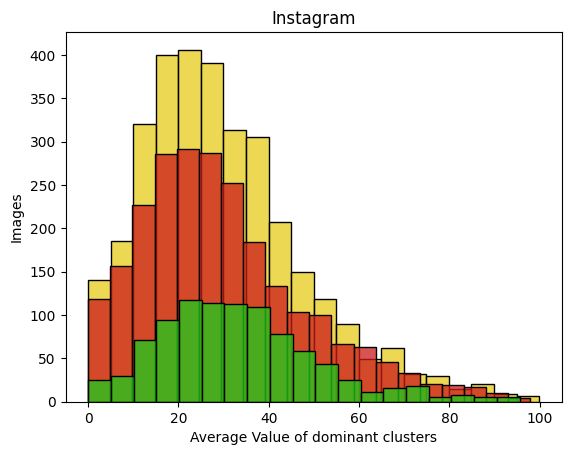

In [136]:
mean_s_pos_v = df_v_positive["mean_s"].dropna()
mean_s_neu_v = df_v_neutral["mean_s"].dropna()
mean_s_neg_v = df_v_negative["mean_s"].dropna()
print(mean_h_pos_v)
sb.histplot(mean_s_neu_v*100%100, color=(0.9,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_s_neg_v*100%100, color=(0.8,0.1,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_s_pos_v*100%100, color=(0.1,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")

res = kruskal(mean_s_pos_v, mean_s_neu_v, mean_s_neg_v)

print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (sum([len(df_v_positive["mean_s"]), len(df_v_neutral["mean_s"]), len(df_v_negative["mean_s"])]))
print(f"eps={eps}")

res_pos_neu = mannwhitneyu(mean_s_pos_v, mean_s_neu_v)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(mean_s_pos_v) * len(mean_s_neu_v))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(mean_s_neg_v, mean_s_neu_v)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_pos_neu = 1- (2*res_neg_neu.statistic)/(len(mean_s_neg_v) * len(mean_s_neu_v))
print(f"Effect size pos-neu: {effect_size_neg_neu}")

res_pos_neg = mannwhitneyu(mean_s_pos_v, mean_s_neg_v)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(mean_s_pos_v) * len(mean_s_neg_v))
print(f"Effect size pos-neu: {effect_size_pos_neg}")


print(f"Mean for positive : {np.mean(mean_s_pos_v)*100}")
print(f"Mean for neutral : {np.mean(mean_s_neu_v)*100}")
print(f"Mean for negative : {np.mean(mean_s_neg_v)*100}")

##### Value

15      0.312974
19      0.183423
33      0.199648
37      0.245944
40      0.243355
          ...   
6869    0.344437
6886    0.320867
6887    0.523139
6889    0.136219
6900    0.326532
Name: mean_h, Length: 949, dtype: float64
Kruskal-Wallis for all KruskalResult(statistic=13.845042345960474, pvalue=0.0009853425872176093)
eps=0.0020074006591214257
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=1660532.5, pvalue=0.0003135192637195101)
Effect size pos-neu: -0.0767820377725541
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=4062593.5, pvalue=0.03285446109586568)
Effect size pos-neu: 0.032490909090909126
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1194828.0, pvalue=0.06688074447930906)
Effect size pos-neu: -0.04052808959409204
Effect size: -0.0767820377725541
Mean for positive : 57.97064746972052
Mean for neutral : 55.37486093596543
Mean for negative : 56.25495050034852


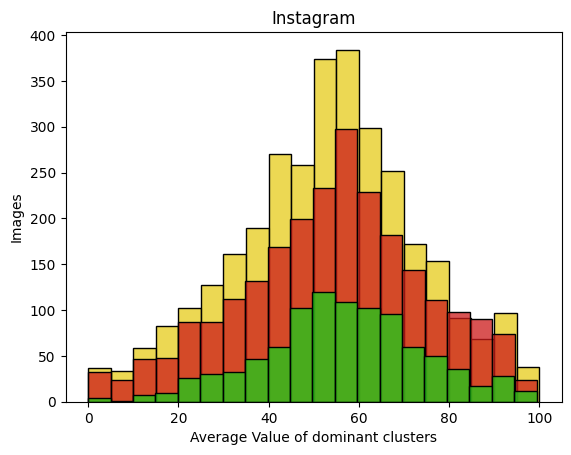

In [137]:
mean_v_pos_v = df_v_positive["mean_v"].dropna()
mean_v_neu_v = df_v_neutral["mean_v"].dropna()
mean_v_neg_v = df_v_negative["mean_v"].dropna()
print(mean_h_pos_v)
sb.histplot(mean_v_neu_v*100%100, color=(0.9,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_v_neg_v*100%100, color=(0.8,0.1,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(mean_v_pos_v*100%100, color=(0.1,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")

res = kruskal(mean_v_pos_v, mean_v_neu_v, mean_v_neg_v)

print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (sum([len(df_v_positive["mean_v"]), len(df_v_neutral["mean_v"]), len(df_v_negative["mean_v"])]))
print(f"eps={eps}")

res_pos_neu = mannwhitneyu(mean_v_pos_v, mean_v_neu_v)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(mean_v_pos_v) * len(mean_v_neu_v))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(mean_v_neg_v, mean_v_neu_v)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_pos_neu = 1- (2*res_neg_neu.statistic)/(len(mean_v_neg_v) * len(mean_v_neu_v))
print(f"Effect size pos-neu: {effect_size_neg_neu}")

res_pos_neg = mannwhitneyu(mean_v_pos_v, mean_v_neg_v)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(mean_v_pos_v) * len(mean_v_neg_v))
print(f"Effect size pos-neu: {effect_size_pos_neg}")

mwu_stat = res_pos_neu.statistic
p = res_pos_neu.pvalue

effect_size = 1- (2*mwu_stat)/(len(mean_v_pos_v) * len(mean_v_neu_v))
print(f"Effect size: {effect_size}")

print(f"Mean for positive : {np.mean(mean_v_pos_v)*100}")
print(f"Mean for neutral : {np.mean(mean_v_neu_v)*100}")
print(f"Mean for negative : {np.mean(mean_v_neg_v)*100}")

### Comparing dominant h, s, v values of posts with positive, negative, or neutral *visual* sentiment

#### Hue

15      0.312974
19      0.183423
33      0.199648
37      0.245944
40      0.243355
          ...   
6869    0.344437
6886    0.320867
6887    0.523139
6889    0.136219
6900    0.326532
Name: mean_h, Length: 949, dtype: float64
Kruskal-Wallis for all KruskalResult(statistic=13.076092640917496, pvalue=0.0014473133251526667)
eps=0.001895910198770117
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=1515033.5, pvalue=0.40826354208877824)
Effect size pos-neu: 0.01756764205236283
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=3717407.0, pvalue=0.00039553587477793794)
Effect size pos-neu: 0.01756764205236283
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1197350.5, pvalue=0.05239628093164889)
Effect size pos-neu: -0.04272483431885665
Effect size: 0.05469624920534011
Mean for positive : 98.6896423479824
Mean for neutral : 109.29035294117647
Mean for negative : 101.35974720466699


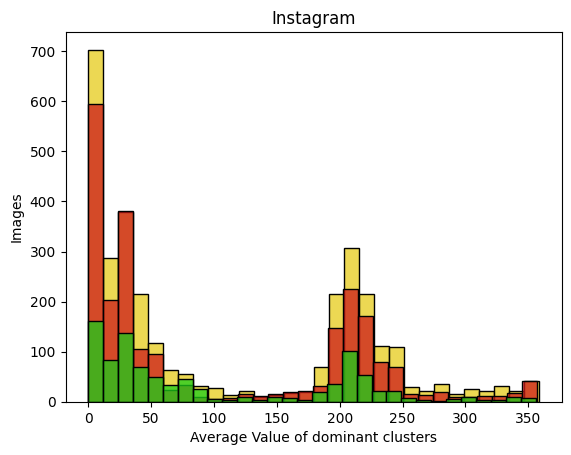

In [34]:
dom_h_pos_v = df_v_positive["dominant_h"].dropna()
dom_h_neu_v = df_v_neutral["dominant_h"].dropna()
dom_h_neg_v = df_v_negative["dominant_h"].dropna()
print(mean_h_pos_v)
sb.histplot(dom_h_neu_v*360%360, color=(0.9,0.8,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_h_neg_v*360%360, color=(0.8,0.1,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_h_pos_v*360%360, color=(0.1,0.8,0.1), binwidth=12).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")

res = kruskal(dom_h_pos_v, dom_h_neu_v, dom_h_neg_v)

print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (sum([len(df_v_positive["dominant_h"]), len(df_v_neutral["dominant_h"]), len(df_v_negative["dominant_h"])]))
print(f"eps={eps}")

res_pos_neu = mannwhitneyu(dom_h_pos_v, dom_h_neu_v)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(dom_h_pos_v) * len(dom_h_neu_v))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(dom_h_neg_v, dom_h_neu_v)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_neg_neu = 1- (2*res_neg_neu.statistic)/(len(dom_h_neg_v) * len(dom_h_neu_v))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_pos_neg = mannwhitneyu(dom_h_pos_v, dom_h_neg_v)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(dom_h_pos_v) * len(dom_h_neg_v))
print(f"Effect size pos-neu: {effect_size_pos_neg}")

mwu_stat = res_neg_neu.statistic
p = res_neg_neu.pvalue

effect_size = 1- (2*mwu_stat)/(len(dom_h_neg_v) * len(dom_h_neu_v))
print(f"Effect size: {effect_size}")

print(f"Mean for positive : {np.mean(dom_h_pos_v)*360}")
print(f"Mean for neutral : {np.mean(dom_h_neu_v)*360}")
print(f"Mean for negative : {np.mean(dom_h_neg_v)*360}")

##### Saturation

15      0.312974
19      0.183423
33      0.199648
37      0.245944
40      0.243355
          ...   
6869    0.344437
6886    0.320867
6887    0.523139
6889    0.136219
6900    0.326532
Name: mean_h, Length: 949, dtype: float64
Kruskal-Wallis for all KruskalResult(statistic=35.289692287469954, pvalue=2.1724044600261436e-08)
eps=0.005116672797951276
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=1716551.0, pvalue=1.0210623698493635e-07)
Effect size pos-neu: -0.11310756261651944
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=3868291.5, pvalue=0.29037757168043354)
Effect size pos-neu: -0.11310756261651944
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1291665.5, pvalue=1.4482368931135555e-08)
Effect size pos-neu: -0.12486000923111762
Effect size: -0.12486000923111762
Mean for positive : 31.458707824541825
Mean for neutral : 26.62877828054298
Mean for negative : 26.843866472208717


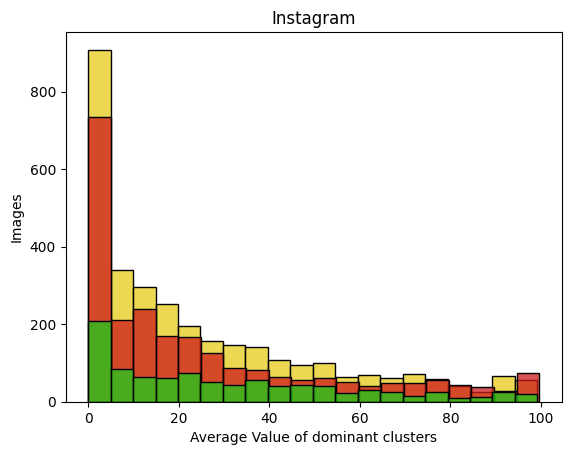

In [35]:
dom_s_pos_v = df_v_positive["dominant_s"].dropna()
dom_s_neu_v = df_v_neutral["dominant_s"].dropna()
dom_s_neg_v = df_v_negative["dominant_s"].dropna()
print(mean_h_pos_v)
sb.histplot(dom_s_neu_v*100%100, color=(0.9,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_s_neg_v*100%100, color=(0.8,0.1,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_s_pos_v*100%100, color=(0.1,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")

res = kruskal(dom_s_pos_v, dom_s_neu_v, dom_s_neg_v)

print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (sum([len(df_v_positive["dominant_s"]), len(df_v_neutral["dominant_s"]), len(df_v_negative["dominant_h"])]))
print(f"eps={eps}")

res_pos_neu = mannwhitneyu(dom_s_pos_v, dom_s_neu_v)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(dom_s_pos_v) * len(dom_s_neu_v))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(dom_s_neg_v, dom_s_neu_v)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_neg_neu = 1- (2*res_neg_neu.statistic)/(len(dom_s_neg_v) * len(dom_s_neu_v))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_pos_neg = mannwhitneyu(dom_s_pos_v, dom_s_neg_v)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(dom_s_pos_v) * len(dom_s_neg_v))
print(f"Effect size pos-neu: {effect_size_pos_neg}")

mwu_stat = res_pos_neg.statistic
p = res_pos_neg.pvalue

effect_size = 1- (2*mwu_stat)/(len(dom_s_pos_v) * len(dom_s_neg_v))
print(f"Effect size: {effect_size}")

print(f"Mean for positive : {np.mean(dom_s_pos_v)*100}")
print(f"Mean for neutral : {np.mean(dom_s_neu_v)*100}")
print(f"Mean for negative : {np.mean(dom_s_neg_v)*100}")

#### Value

15      0.569595
19      0.310292
33      0.514170
37      0.196564
40      0.239867
          ...   
6869    0.705508
6886    0.601411
6887    0.618430
6889    0.525624
6900    0.456237
Name: mean_v, Length: 949, dtype: float64
Kruskal-Wallis for all KruskalResult(statistic=17.38895138670411, pvalue=0.00016750862870788366)
eps=0.0025212340708574902
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=1678703.5, pvalue=3.204064977520345e-05)
Effect size pos-neu: -0.088565129285888
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=3974811.5, pvalue=0.4874036725042228)
Effect size pos-neu: -0.088565129285888
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1235463.0, pvalue=0.0005944849335838197)
Effect size pos-neu: -0.07591549173118284
Effect size: -0.088565129285888
Mean for positive : 59.31093617636727
Mean for neutral : 54.26527903469079
Mean for negative : 54.702641387133376


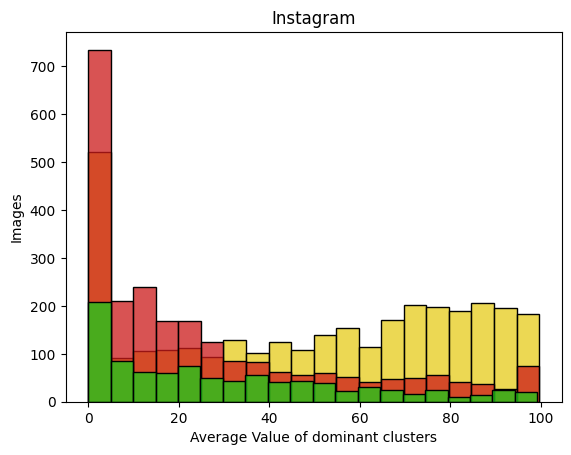

In [36]:
dom_v_pos_v = df_v_positive["dominant_v"].dropna()
dom_v_neu_v = df_v_neutral["dominant_v"].dropna()
dom_v_neg_v = df_v_negative["dominant_v"].dropna()
print(mean_v_pos_v)
sb.histplot(dom_v_neu_v*100%100, color=(0.9,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_s_neg_v*100%100, color=(0.8,0.1,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")
sb.histplot(dom_s_pos_v*100%100, color=(0.1,0.8,0.1), binwidth=5).set(title='Instagram',xlabel='Average Value of dominant clusters', ylabel="Images")

res = kruskal(dom_v_pos_v, dom_v_neu_v, dom_v_neg_v)

print(f"Kruskal-Wallis for all {res}")
eps = res.statistic / (sum([len(df_v_positive["dominant_v"]), len(df_v_neutral["dominant_v"]), len(df_v_negative["dominant_v"])]))
print(f"eps={eps}")

res_pos_neu = mannwhitneyu(dom_v_pos_v, dom_v_neu_v)
print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(dom_v_pos_v) * len(dom_v_neu_v))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_neg_neu = mannwhitneyu(dom_v_neg_v, dom_v_neu_v)
print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
effect_size_neg_neu = 1- (2*res_neg_neu.statistic)/(len(dom_v_neg_v) * len(dom_v_neu_v))
print(f"Effect size pos-neu: {effect_size_pos_neu}")

res_pos_neg = mannwhitneyu(dom_v_pos_v, dom_v_neg_v)
print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(dom_v_pos_v) * len(dom_v_neg_v))
print(f"Effect size pos-neu: {effect_size_pos_neg}")
''
mwu_stat = res_pos_neu.statistic
p = res_pos_neu.pvalue

effect_size = 1- (2*mwu_stat)/(len(dom_v_pos_v) * len(dom_v_neu_v))
print(f"Effect size: {effect_size}")

print(f"Mean for positive : {np.mean(dom_v_pos_v)*100}")
print(f"Mean for neutral : {np.mean(dom_v_neu_v)*100}")
print(f"Mean for negative : {np.mean(dom_v_neg_v)*100}")

### Effects of textual sentiment on overall frequency of colornames

In [37]:
dfc_t_positive = df_complete.loc[df_complete["Sentiment"] == "positive"]
dfc_t_neutral = df_complete.loc[df_complete["Sentiment"] == "neutral"]
dfc_t_negative = df_complete.loc[df_complete["Sentiment"] == "negative"]
print(f"positive posts:{len(dfc_t_positive)}")
print(f"neutral posts:{len(dfc_t_neutral)}")
print(f"negative posts:{len(dfc_t_negative)}")


positive posts:1941
neutral posts:3003
negative posts:1679


In [38]:
for colorname in colornames:
    print(f"\n\nSTATISTICAL TESTS FOR THE COLOR {colorname.upper()}")
    color_pos_t = dfc_t_positive[colorname].dropna()
    color_neu_t = dfc_t_neutral[colorname].dropna()
    color_neg_t = dfc_t_negative[colorname].dropna()

    res = kruskal(color_pos_t, color_neu_t, color_neg_t)
    H = res.statistic
    p = res.pvalue
    print(f"H={H}, p={p}")
    print("This is significant!") if p < 0.05 else print("")
    eps = H / (sum([len(color_pos_t), len(color_neu_t), len(color_neg_t)]))
    print(f"eps={eps}")
    if eps >= 0.5:
        print("\"High\" effect size!")

    res_pos_neu = mannwhitneyu(color_pos_t, color_neu_t)
    print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
    effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(color_pos_t) * len(color_neu_t))
    print(f"Effect size positive-neutral: {effect_size_pos_neu}")
    if effect_size_pos_neu >= 0.05:
        print("\"High\" effect size!")

    

    res_neg_neu = mannwhitneyu(color_neg_t, color_neu_t)
    print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
    effect_size_neg_neu = 1- (2*res_neg_neu.statistic)/(len(color_neg_t) * len(color_neu_t))
    print(f"Effect size negative-neutral: {effect_size_neg_neu}")
    if effect_size_neg_neu >= 0.05:
        print("\"High\" effect size!")

    res_pos_neg = mannwhitneyu(color_pos_t, color_neg_t)
    print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
    effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(color_pos_t) * len(color_neg_t))
    print(f"Effect size positive-neutral: {effect_size_pos_neg}")
    if effect_size_pos_neg >= 0.05:
        print("\"High\" effect size!")

    
    
    print(f"Mean for positive : {np.mean(color_pos_t)}")
    print(f"Mean for neutral : {np.mean(color_neu_t)}")
    print(f"Mean for negative : {np.mean(color_neg_t)}")

    



STATISTICAL TESTS FOR THE COLOR BLACK
H=37.19026693176666, p=8.39916562923775e-09
This is significant!
eps=0.0056153203883084184
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=2637644.0, pvalue=3.3923986274669433e-09)
Effect size positive-neutral: 0.09496514133299294
"High" effect size!
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=2369837.0, pvalue=0.0003789405502805248)
Effect size negative-neutral: 0.059968421493138635
"High" effect size!
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1571345.0, pvalue=0.0505505749686907)
Effect size positive-neutral: 0.035670811880799236
Mean for positive : 0.11349345943472212
Mean for neutral : 0.1624644764214947
Mean for negative : 0.12925489743678703


STATISTICAL TESTS FOR THE COLOR GRAY
H=2.0257224285880473, p=0.3631783604480969

eps=0.0003058617588084021
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=2847205.5, pvalue=0.1692938270285067)
Effect size positive-neutr

##### Effects of visual sentiment on overall frequency of colornames

In [39]:
dfc_v_positive = df_complete.loc[df_complete["Impression_or_Sentiment"] == "Positive"]
dfc_v_neutral = df_complete.loc[df_complete["Impression_or_Sentiment"] == "Neutral"]
dfc_v_negative = df_complete.loc[df_complete["Impression_or_Sentiment"] == "Negative"]
print(f"positive posts:{len(dfc_v_positive)}")
print(f"neutral posts:{len(dfc_v_neutral)}")
print(f"negative posts:{len(dfc_v_negative)}")



positive posts:949
neutral posts:3250
negative posts:2420


In [40]:
for colorname in colornames:
    print(f"\n\nSTATISTICAL TESTS FOR THE COLOR {colorname.upper()}")
    color_pos_t = dfc_v_positive[colorname].dropna()
    color_neu_t = dfc_v_neutral[colorname].dropna()
    color_neg_t = dfc_v_negative[colorname].dropna()

    res = kruskal(color_pos_t, color_neu_t, color_neg_t)
    H = res.statistic
    p = res.pvalue
    print(f"H={H}, p={p}")
    print("This is significant!") if p < 0.05 else print("")
    eps = H / (sum([len(color_pos_t), len(color_neu_t), len(color_neg_t)]))
    print(f"eps={eps}")
    if eps >= 0.5:
        print("\"High\" effect size!")

    res_pos_neu = mannwhitneyu(color_pos_t, color_neu_t)
    print(f"Mann-Whitney-U for positive-neutral: {res_pos_neu}")
    effect_size_pos_neu = 1- (2*res_pos_neu.statistic)/(len(color_pos_t) * len(color_neu_t))
    print(f"Effect size positive-neutral: {effect_size_pos_neu}")
    if effect_size_pos_neu >= 0.05:
        print("\"High\" effect size!")

    

    res_neg_neu = mannwhitneyu(color_neg_t, color_neu_t)
    print(f"Mann-Whitney-U for negative-neutral: {res_neg_neu}")
    effect_size_neg_neu = 1- (2*res_neg_neu.statistic)/(len(color_neg_t) * len(color_neu_t))
    print(f"Effect size negative-neutral: {effect_size_neg_neu}")
    if effect_size_neg_neu >= 0.05:
        print("\"High\" effect size!")

    res_pos_neg = mannwhitneyu(color_pos_t, color_neg_t)
    print(f"Mann-Whitney-U for positive-negative: {res_pos_neg}")
    effect_size_pos_neg = 1- (2*res_pos_neg.statistic)/(len(color_pos_t) * len(color_neg_t))
    print(f"Effect size positive-neutral: {effect_size_pos_neg}")
    if effect_size_pos_neg >= 0.05:
        print("\"High\" effect size!")

    
    print(f"Mean for positive : {np.mean(color_pos_t)}")
    print(f"Mean for neutral : {np.mean(color_neu_t)}")
    print(f"Mean for negative : {np.mean(color_neg_t)}")



STATISTICAL TESTS FOR THE COLOR BLACK
H=39.66592595916108, p=2.4358672599310896e-09
This is significant!
eps=0.0059927369631607615
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=1343836.0, pvalue=2.619482362461262e-10)
Effect size positive-neutral: 0.128581664910432
"High" effect size!
Mann-Whitney-U for negative-neutral: MannwhitneyuResult(statistic=3820449.5, pvalue=0.05480547321582759)
Effect size negative-neutral: 0.02849345200254294
Mann-Whitney-U for positive-negative: MannwhitneyuResult(statistic=1034893.0, pvalue=2.6036262502866987e-06)
Effect size positive-neutral: 0.09875292826724957
"High" effect size!
Mean for positive : 0.08263618474004641
Mean for neutral : 0.15509719558403925
Mean for negative : 0.1415882455252176


STATISTICAL TESTS FOR THE COLOR GRAY
H=9.338229052792073, p=0.009380572099593407
This is significant!
eps=0.0014108217333119917
Mann-Whitney-U for positive-neutral: MannwhitneyuResult(statistic=1450707.5, pvalue=0.005281464214902133)
Effe

##### Effects of Platform on colorname frequency

In [41]:
dfc_instagram = df_complete.loc[df_complete["platform_x"] == "instagram"]
dfc_tiktok = df_complete.loc[df_complete["platform_x"] == "tiktok"]

print(f"Insta posts: {len(dfc_instagram)}")
print(f"Tiktok posts: {len(dfc_tiktok)}")

Insta posts: 3802
Tiktok posts: 2821


In [42]:
for colorname in colornames:
    print(f"\n\nSTATISTICAL TESTS FOR THE COLOR {colorname.upper()}")
    color_ig = dfc_instagram [colorname].dropna()
    color_tt = dfc_tiktok[colorname].dropna()

    res = mannwhitneyu(color_ig, color_tt)
    z = res.statistic
    p=res.pvalue
    print(f"Mann-Whitney-U test: (z={z}, p={p})")
    if p < 0.05:
        print("This is significant!")
    effect_size = 1- (2*z)/(len(color_ig) * len(color_tt))
    print(f"Effect size: {effect_size}")

    
    print(f"Mean for Instagram: {np.mean(color_ig)}")
    print(f"Mean for Tiktok: {np.mean(color_tt)}")



STATISTICAL TESTS FOR THE COLOR BLACK
Mann-Whitney-U test: (z=3905559.0, p=1.4429458148316598e-87)
This is significant!
Effect size: 0.2717206433077537
Mean for Instagram: 0.08656790332874109
Mean for Tiktok: 0.2112936660039121


STATISTICAL TESTS FOR THE COLOR GRAY
Mann-Whitney-U test: (z=5116794.0, p=0.0013554179493636682)
This is significant!
Effect size: 0.04585862288938769
Mean for Instagram: 0.24633067002504103
Mean for Tiktok: 0.2643041165024233


STATISTICAL TESTS FOR THE COLOR WHITE
Mann-Whitney-U test: (z=6148435.0, p=7.031969728207918e-32)
This is significant!
Effect size: -0.14651405508509585
Mean for Instagram: 0.1307562411736442
Mean for Tiktok: 0.05623148836612682


STATISTICAL TESTS FOR THE COLOR ORANGE
Mann-Whitney-U test: (z=4307748.0, p=1.565068782433487e-46)
This is significant!
Effect size: 0.1967234543807146
Mean for Instagram: 0.06923245047865673
Mean for Tiktok: 0.10359682358093433


STATISTICAL TESTS FOR THE COLOR ORANGE-YELLOW
Mann-Whitney-U test: (z=4939478

Mean for Tiktok: 0.16869867243819509


STATISTICAL TESTS FOR THE COLOR YELLOW
Mann-Whitney-U test: (z=5622011.5, p=1.2350466808589297e-05)
This is significant!
Effect size: -0.048350548163889284
Mean for Instagram: 0.05081441506227295
Mean for Tiktok: 0.0491667261020537


STATISTICAL TESTS FOR THE COLOR YELLOW-GREEN
Mann-Whitney-U test: (z=5565819.5, p=2.581622461267899e-05)
This is significant!
Effect size: -0.03787228535663156
Mean for Instagram: 0.03685458711192174
Mean for Tiktok: 0.028659595531389383


STATISTICAL TESTS FOR THE COLOR GREEN
Mann-Whitney-U test: (z=5377171.5, p=0.7043273849553278)
Effect size: -0.002694620883689547
Mean for Instagram: 0.017940235068945494
Mean for Tiktok: 0.012114710486143331


STATISTICAL TESTS FOR THE COLOR GREEN-BLUE
Mann-Whitney-U test: (z=5374404.0, p=0.6782540623838293)
Effect size: -0.0021785582356419475
Mean for Instagram: 0.009586528001011214
Mean for Tiktok: 0.005120401461505014


STATISTICAL TESTS FOR THE COLOR BLUE
Mann-Whitney-U test: (

## Hashtags and Color

In [43]:
hashtags = df_total["Hashtag"].unique()
dfs_per_hashtag = {}
for hashtag in hashtags:
    print(hashtag,":")
    print(len(df_total.loc[df_total["Hashtag"] == hashtag]))
    dfs_per_hashtag[hashtag] = df_total.loc[df_total["Hashtag"] == hashtag]

print(dfs_per_hashtag["klimawandel"])
    


climatechange :
1035
climatecrisis :
1167
klimakrise :
1283
klimaschutz :
1249
klimawandel :
1313
savetheplanet :
858
                                   id                 Filename  \
2577                    klimawandel_1        klimawandel_1.jpg   
2578                    klimawandel_2        klimawandel_2.jpg   
2579                    klimawandel_3        klimawandel_3.jpg   
2580                    klimawandel_4        klimawandel_4.jpg   
2581                    klimawandel_5        klimawandel_5.jpg   
...                               ...                      ...   
6574  klimawandel_7086125814005255430  7086125814005255430.jpg   
6575  klimawandel_7210319548384283909  7210319548384283909.jpg   
6576  klimawandel_6981510960070610182  6981510960070610182.jpg   
6577  klimawandel_7011161118722854150  7011161118722854150.jpg   
6578  klimawandel_7086480885653998854  7086480885653998854.jpg   

                         Account  \
2577  Faktastisch - Das Original   
2578             

In [44]:
dependent_variables=["mean_h", "mean_s", "mean_v"]

for dv in dependent_variables:
    print(f"\n\nSTATISTICAL TESTS FOR {dv.upper()}")
    samples = []
    samplesize = 0
    for hashtag in hashtags:
        samples.append(dfs_per_hashtag[hashtag].dropna()[dv].to_numpy())
        print(hashtag, ":" ,len(dfs_per_hashtag[hashtag].dropna()[dv].to_numpy()))
        samplesize += len(dfs_per_hashtag[hashtag].dropna()[dv].to_numpy())
    #samples_tuple = tuple(samples)
    #print(samples_tuple)
    print(len(samples))
    res = kruskal(*samples)
    print(res)
    H = res.statistic
    p = res.pvalue
    eps = H / samplesize
    print(f"Kruskal-Wallis-Test: (H={H}, p={p})")
    if p < 0.05:
        print("This is significant!")
        print(f"Effect size: {eps}")

        print("-- Post-hoc tests: --")
        for i in range(len(hashtags)):
            hashtag_x = hashtags[i]
            samples_x = dfs_per_hashtag[hashtag_x][dv].dropna()
            for j in range(i+1, len(hashtags)):
                hashtag_y = hashtags[j]
                samples_y = dfs_per_hashtag[hashtag_y][dv].dropna()
                
                res = mannwhitneyu(samples_x, samples_y)
                print(f"Mann-Whitney-U Test between #{hashtag_x} and #{hashtag_y}")
                z = res.statistic
                p=res.pvalue
                print(f"z={z}, p={p}")
                if p<0.05:
                    effect_size = 1- (2*z)/(len(samples_x) * len(samples_y))
                    print(f"Effect size: {effect_size}")
                print(f"Mean(#{hashtag_x}): {np.mean(samples_x)})")
                print(f"Mean(#{hashtag_y}): {np.mean(samples_y)})")
                    

    



STATISTICAL TESTS FOR MEAN_H
climatechange : 1029
climatecrisis : 1112
klimakrise : 1281
klimaschutz : 1172
klimawandel : 1178
savetheplanet : 839
6
KruskalResult(statistic=153.39568177169693, pvalue=2.526707785650656e-31)
Kruskal-Wallis-Test: (H=153.39568177169693, p=2.526707785650656e-31)
This is significant!
Effect size: 0.02320309813518332
-- Post-hoc tests: --
Mann-Whitney-U Test between #climatechange and #climatecrisis
z=608130.5, p=0.025184142011040567
Effect size: -0.055823361155600715
Mean(#climatechange): 0.3354221557938895)
Mean(#climatecrisis): 0.3076119594268509)
Mann-Whitney-U Test between #climatechange and #klimakrise
z=566073.0, p=1.4235623860403427e-09
Effect size: 0.14608831415673895
Mean(#climatechange): 0.3354221557938895)
Mean(#klimakrise): 0.38256681883378674)
Mann-Whitney-U Test between #climatechange and #klimaschutz
z=525653.0, p=6.226108008128078e-08
Effect size: 0.13331519678158643
Mean(#climatechange): 0.3354221557938895)
Mean(#klimaschutz): 0.3712010348

## Influence of Topics

In [45]:
# list all topics
topics = df_total["BERTopic"].unique()
topics.sort()
for topic in topics:
    count_tpc = len(df_total.loc[df_total["BERTopic"] == topic])
    print(f"There are {count_tpc} posts for {topic}")

There are 2635 posts for -1_klimawandel_klimaschutz_climatechange_klimakrise
There are 2591 posts for 0_klimaschutz_klimawandel_klimakrise_climatechange
There are 62 posts for 10_meat_fleisch_vegan_dairy
There are 68 posts for 11_maui_wildfires_fires_canada
There are 80 posts for 12_sunmoney_makemoney_makemoney savetheplanet_solar
There are 42 posts for 13_plastic_waste_plasticfree_savetheplanet
There are 37 posts for 14_thunberg_greta_greta thunberg_gretathunberg
There are 48 posts for 15_amazonas_indigenous_regenwald_lula
There are 32 posts for 16_lützerath_räumung_rwe_innen
There are 20 posts for 17_trashmaid_thelittletrashmaid_mermaid_thelittletrashmaid trashmaid
There are 29 posts for 18_wildlifephotographer_eleph ants7_eleph_ants7
There are 214 posts for 1_savetheplanet_pa_pa pa_viral
There are 195 posts for 2_ice_gletscher_schnee_antarktis
There are 128 posts for 3_heat_record_temperatures_grad
There are 156 posts for 4_congo_kinder_people_climate
There are 121 posts for 5_oil_s

In [46]:
dependent_variables_topics = ["mean_h", "dominant_h", "mean_s", "dominant_s", "mean_v", "dominant_v"]

In [138]:
# run all tests in one cell
for dv in dependent_variables_topics:
    print(f"\n\nSTATISTICAL TESTS FOR {dv.upper()}")
    samples = []
    samplesize = 0
    for topic in topics:
        topic_inliers = df_total.loc[df_total["BERTopic"] == topic][dv].dropna()
        samples.append(topic_inliers)
        samplesize += len(topic_inliers)
    #samples_tuple = tuple(samples)
    #print(samples_tuple)
    print(len(samples))
    res = kruskal(*samples)
    print(res)
    H = res.statistic
    p = res.pvalue
    eps = H / samplesize
    print(f"Kruskal-Wallis-Test: (H={H}, p={p})")
    if p < 0.05:
        print("This is significant!")
        print(f"Effect size: {eps}")

        print("-- Post-hoc tests: --")
        for topic in topics:
            samples_inliers = df_total.loc[df_total["BERTopic"] == topic][dv].dropna()
            samples_outliers = df_total.loc[df_total["BERTopic"] != topic][dv].dropna()
            
            res = mannwhitneyu(samples_inliers, samples_outliers)
            print(f"Mann-Whitney-U Test between Inliers and Outliers of Topic {topic}")
            z = res.statistic
            p=res.pvalue
            print(f"z={z}, p={p}")
            if p<0.05:
                effect_size = 1- (2*z)/(len(samples_inliers) * len(samples_outliers))
                print(f"Effect size: {effect_size}")
                print(f"Mean( {topic}): {np.mean(samples_inliers)})")
                print(f"Mean(not {topic}): {np.mean(samples_outliers)})")
            print("\n")
                




STATISTICAL TESTS FOR MEAN_H
20
KruskalResult(statistic=31.925301943346685, pvalue=0.0318653186528743)
Kruskal-Wallis-Test: (H=31.925301943346685, p=0.0318653186528743)
This is significant!
Effect size: 0.004820368706529772
-- Post-hoc tests: --
Mann-Whitney-U Test between Inliers and Outliers of Topic -1_klimawandel_klimaschutz_climatechange_klimakrise
z=5089701.5, p=0.22465169327554502


Mann-Whitney-U Test between Inliers and Outliers of Topic 0_klimaschutz_klimawandel_klimakrise_climatechange
z=5261190.5, p=0.0396848038500054
Effect size: -0.030244845143807986
Mean( 0_klimaschutz_klimawandel_klimakrise_climatechange): 0.3512018921957506)
Mean(not 0_klimaschutz_klimawandel_klimakrise_climatechange): 0.33715042750295915)


Mann-Whitney-U Test between Inliers and Outliers of Topic 10_meat_fleisch_vegan_dairy
z=195407.5, p=0.5942130443846918


Mann-Whitney-U Test between Inliers and Outliers of Topic 11_maui_wildfires_fires_canada
z=233812.5, p=0.3622783885759078


Mann-Whitney-U Tes

In [50]:
for topic in topics:
    mean_r = np.mean(df_complete.loc[df_complete["BERTopic"] == topic]["mean_r"])
    mean_g = np.mean(df_complete.loc[df_complete["BERTopic"] == topic]["mean_g"])
    mean_b = np.mean(df_complete.loc[df_complete["BERTopic"] == topic]["mean_b"])
    print(f"Mean color for topic {topic}: {mean_r}, {mean_g}, {mean_b}")

Mean color for topic -1_klimawandel_klimaschutz_climatechange_klimakrise: 0.4934765457746198, 0.47331846615787887, 0.4587372112021684
Mean color for topic 0_klimaschutz_klimawandel_klimakrise_climatechange: 0.4948899091005433, 0.47231846733397076, 0.46020431448658483
Mean color for topic 10_meat_fleisch_vegan_dairy: 0.5144175184052941, 0.5100093038199981, 0.49528981806711825
Mean color for topic 11_maui_wildfires_fires_canada: 0.5136940562488715, 0.5160754745579011, 0.5087627258257994
Mean color for topic 12_sunmoney_makemoney_makemoney savetheplanet_solar: 0.47326823910349536, 0.46205962339008905, 0.4322968674509268
Mean color for topic 13_plastic_waste_plasticfree_savetheplanet: 0.5195012496209583, 0.4902396141421707, 0.4693451519747798
Mean color for topic 14_thunberg_greta_greta thunberg_gretathunberg: 0.46798064365679315, 0.47110689720804994, 0.44663857878720936
Mean color for topic 15_amazonas_indigenous_regenwald_lula: 0.5185790538732764, 0.4803053143587586, 0.4423550260146265
M

## Influence of type of media

In [48]:
print(df_complete["Type_of_media_content"].unique())
df_photo = df_complete.loc[df_complete["Type_of_media_content"]=="Photo"]
df_text = df_complete.loc[df_complete["Type_of_media_content"]=="Text"]
df_diagram = df_complete.loc[df_complete["Type_of_media_content"]=="Diagram"]
df_drawing = df_complete.loc[df_complete["Type_of_media_content"]=="Drawing"]

print(len(df_photo))
print(len(df_text))
print(len(df_diagram))
print(len(df_drawing))

['Photo' 'Text' 'Diagram' 'Drawing' nan 'Video']
4973
1095
168
319


In [49]:
dependent_variables = ["mean_h_x", "mean_s_x", "mean_v_x", "dominant_h_x", "dominant_s_x", "dominant_v_x"]
independent_variable = "Type_of_media_content"
iv_values = ["Photo", "Text", "Diagram", "Drawing"]
for dv in dependent_variables:
    data_columns = []
    for val in iv_values:
        col = df_complete.loc[df_complete[independent_variable]==val][dv]
        data_columns.append(col)

    print(f"statistical tests for influence of {independent_variable} on variable {dv}:")

    res = kruskal(*data_columns)

    H = res.statistic
    p = res.pvalue
    print(f"H={H}, p={p}")

    if p<0.05:
        print("This is significant!")
        eps = H / (sum([len(color_pos_t), len(color_neu_t), len(color_neg_t)]))
        print(f"eps={eps}")

        for val in iv_values:
            inliers = df_complete.loc[df_complete[independent_variable]==val][dv]
            outliers = df_complete.loc[df_complete[independent_variable]!=val][dv]

            res_posthoc = mannwhitneyu(inliers, outliers)

            U=res_posthoc.statistic
            p_ph = res_posthoc.pvalue
            print(f"Posthoc test for inliers and outliers of {val}")
            print(f"U={U}, p={p_ph}")
            if p_ph < 0.05:
                print("significant!")
                effect_size = 1- (2*U)/(len(inliers) * len(outliers))
                print(f"r-squared: {effect_size}")
            print(f"Mean inliers: {np.mean(inliers)}")
            print(f"Mean outliers: {np.mean(outliers)}")
    print("\n\n")
                


statistical tests for influence of Type_of_media_content on variable mean_h_x:
H=28.53553757666792, p=2.803558262205238e-06
This is significant!
eps=0.004311155397592978
Posthoc test for inliers and outliers of Photo
U=4444588.0, p=3.781975393220075e-07
significant!
r-squared: -0.08332583831477858
Mean inliers: 0.34928897006561876
Mean outliers: 0.3213787957120964
Posthoc test for inliers and outliers of Text
U=2819164.0, p=0.00033292503551791893
significant!
r-squared: 0.06853147777359259
Mean inliers: 0.3240418053827077
Mean outliers: 0.34595934952373664


Posthoc test for inliers and outliers of Diagram
U=523252.0, p=0.43819593821931446
Mean inliers: 0.3287199316811822
Mean outliers: 0.34269002518030084
Posthoc test for inliers and outliers of Drawing
U=893499.5, p=0.0007759514401591883
significant!
r-squared: 0.11137726158840289
Mean inliers: 0.30545409451683175
Mean outliers: 0.34420196778401196



statistical tests for influence of Type_of_media_content on variable mean_s_x:
H=3.5851728996400465, p=0.309882330419009



statistical tests for influence of Type_of_media_content on variable mean_v_x:
H=425.0477200183214, p=8.303045260506487e-92
This is significant!
eps=0.06421630458049878
Posthoc test for inliers and outliers of Photo
U=3138466.0, p=1.4716651024234712e-46
significant!
r-squared: 0.2350289137097904
Mean inliers: 0.5411265895939126
Mean outliers: 0.6198163085524029
Posthoc test for inliers and outliers of Text
U=3292360.5, p=4.267236780737605e-06
significant!
r-squared: -0.08781545506809674
Mean inliers: 0.5794355418233261

## Platform differences and image content

platform  instagram  tiktok
People                     
False          2034     734
True           1767    2364

This is significant
Chi-squared: 631.7506479640726, p=2.0800428991751865e-139
Effect size: Cramer's V=0.3026075612579174


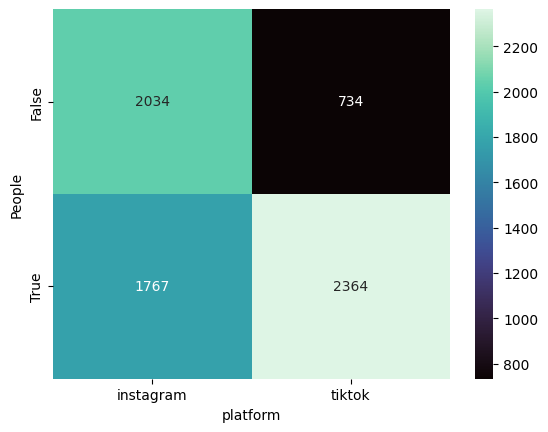

In [84]:
iv = "platform"
dv = "People"

# first, make contingency table
def full_chi_square(iv, dv):

    contingency_table = pd.crosstab(index=df_total[dv], columns=df_total[iv])
    sb.heatmap(contingency_table, annot=True, fmt='.0f', cmap='mako')
    print(contingency_table)
    print("")

    #perform chi squared test of independence
    res = chi2_contingency(contingency_table, correction=False)
    sample_size = contingency_table.sum().sum()
    chi_sq = res.statistic
    p=res.pvalue
    print("This is significant") if p <0.05 else print("")
    cramers_V = sqrt((res.statistic/sample_size))
    print(f"Chi-squared: {chi_sq}, p={p}")
    print(f"Effect size: Cramer's V={cramers_V}")

full_chi_square(iv, dv)

platform  instagram  tiktok
Animals                    
False          3447    2888
True            354     210

This is significant
Chi-squared: 14.608897126040798, p=0.00013228850417293776
Effect size: Cramer's V=0.04601671823543183


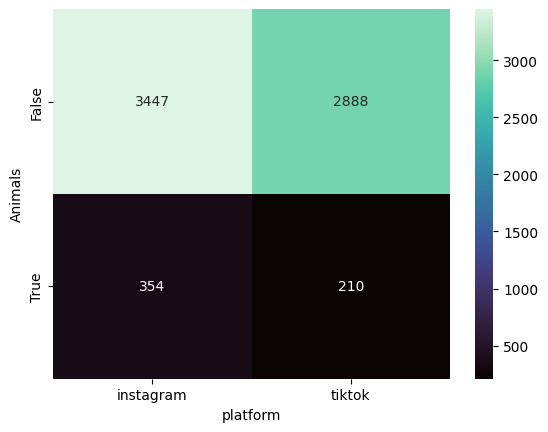

In [85]:
iv = "platform"
dv = "Animals"

full_chi_square(iv, dv)

platform  instagram  tiktok
Nature                     
False          2399    2265
True           1402     833

This is significant
Chi-squared: 77.8832379802481, p=1.0931510630251495e-18
Effect size: Cramer's V=0.10624999713018804


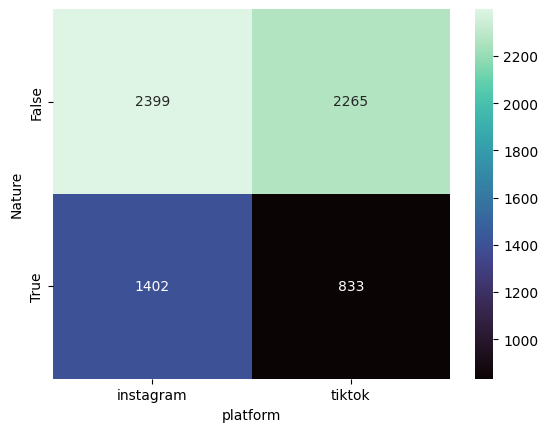

In [86]:
iv = "platform"
dv = "Nature"

full_chi_square(iv, dv)

platform           instagram  tiktok
Natural_Disasters                   
False                   3407    2882
True                     394     214

This is significant
Chi-squared: 25.316577940383162, p=4.865093636809877e-07
Effect size: Cramer's V=0.06058601495491374


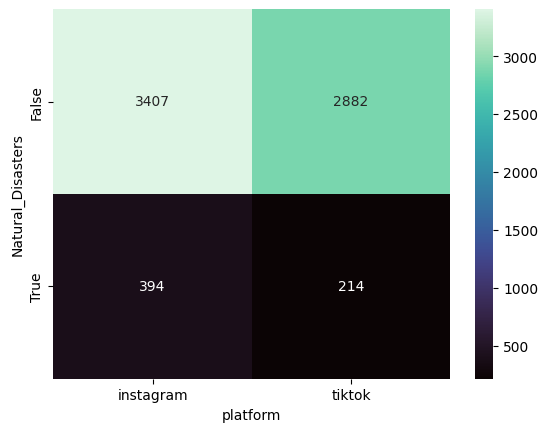

In [87]:
iv = "platform"
dv = "Natural_Disasters"

full_chi_square(iv, dv)

platform   instagram  tiktok
Artifacts                   
False           2184    1957
True            1617    1141

This is significant
Chi-squared: 23.201936607692012, p=1.4585037779128198e-06
Effect size: Cramer's V=0.05799212801977083


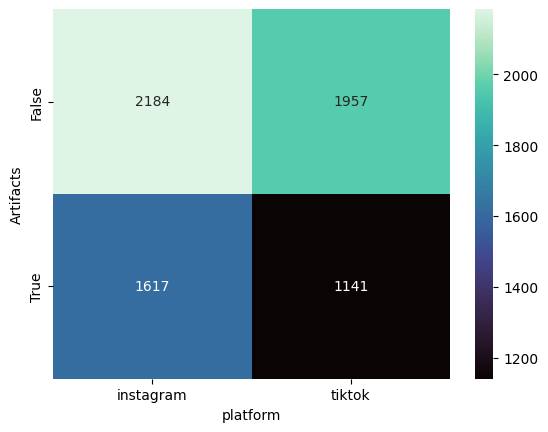

In [88]:
iv = "platform"
dv = "Artifacts"

full_chi_square(iv, dv)

platform                 instagram  tiktok
Education_Facts_or_News                   
False                          816    1370
True                          2985    1726

This is significant
Chi-squared: 409.07485556651545, p=5.82783437111479e-91
Effect size: Cramer's V=0.24354054852780516


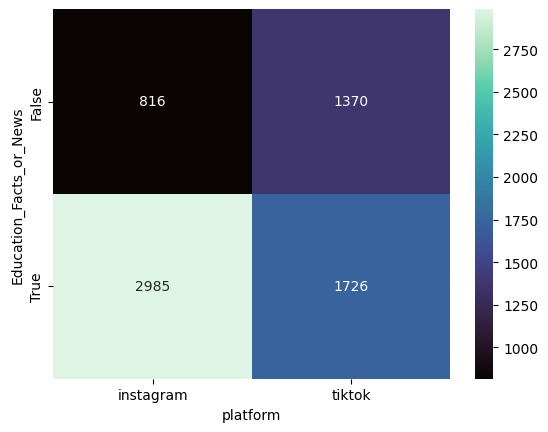

In [89]:

iv = "platform"
dv = "Education_Facts_or_News"

full_chi_square(iv, dv)

platform                                            instagram  tiktok
BERTopic                                                             
-1_klimawandel_klimaschutz_climatechange_klimak...       1415    1220
0_klimaschutz_klimawandel_klimakrise_climatechange       1162    1429
10_meat_fleisch_vegan_dairy                                57       5
11_maui_wildfires_fires_canada                             60       8
12_sunmoney_makemoney_makemoney savetheplanet_s...         80       0
13_plastic_waste_plasticfree_savetheplanet                 27      15
14_thunberg_greta_greta thunberg_gretathunberg             20      17
15_amazonas_indigenous_regenwald_lula                      40       8
16_lützerath_räumung_rwe_innen                             28       4
17_trashmaid_thelittletrashmaid_mermaid_thelitt...         19       1
18_wildlifephotographer_eleph ants7_eleph_ants7            29       0
1_savetheplanet_pa_pa pa_viral                             91     123
2_ice_gletscher_schn

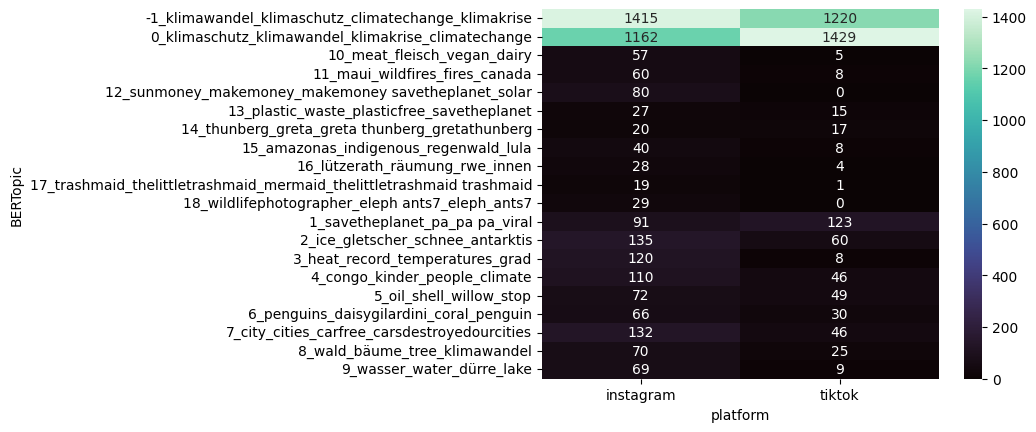

In [90]:
iv="platform"
dv="BERTopic"
full_chi_square(iv,dv)

platform                 instagram  tiktok
Impression_or_Sentiment                   
Negative                      1528     987
Neutral                       1640    1769
Positive                       633     340

This is significant
Chi-squared: 138.87398562725235, p=6.980671176123498e-31
Effect size: Cramer's V=0.14189932738991118


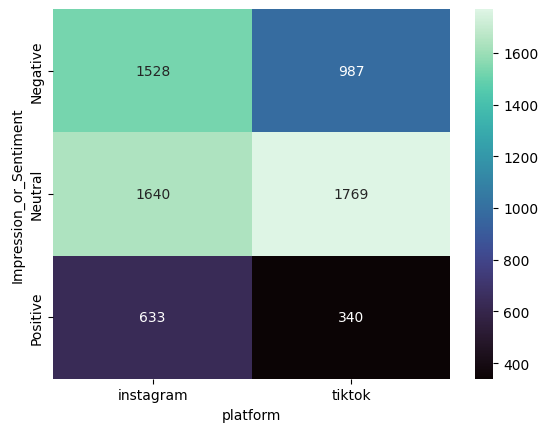

In [91]:
iv = "platform"
dv = "Impression_or_Sentiment"

full_chi_square(iv, dv)

platform               instagram  tiktok
Type_of_media_content                   
Diagram                      155      14
Drawing                      247      78
Photo                       2733    2453
Text                         663     483
Video                          3      68

This is significant
Chi-squared: 238.84765207605017, p=1.6428721411295313e-50
Effect size: Cramer's V=0.18609314484478195


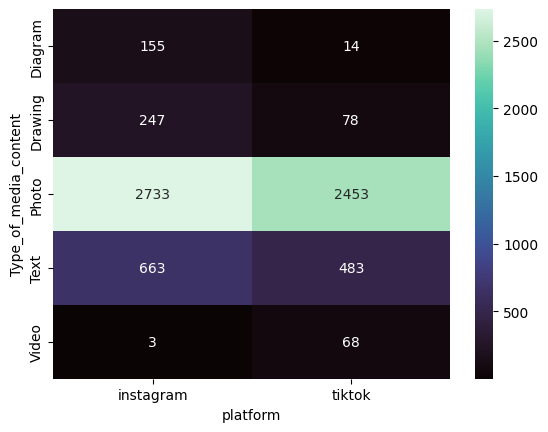

In [92]:
iv = "platform"
dv = "Type_of_media_content"
full_chi_square(iv, dv)

platform   instagram  tiktok
Sentiment                   
negative        1103     638
neutral         1327    1859
positive        1372     606

This is significant
Chi-squared: 443.45449450731985, p=5.070841432053776e-97
Effect size: Cramer's V=0.2534210517546986


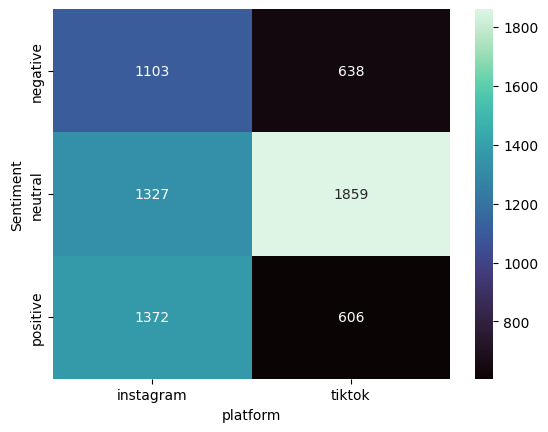

In [93]:
iv = "platform"
dv = "Sentiment"

full_chi_square(iv, dv)

## Textual sentiment and image content

Sentiment                negative  neutral  positive
Education_Facts_or_News                             
False                         402     1032       752
True                         1338     2149      1224

This is significant
Chi-squared: 97.08713454819282, p=8.275544930907614e-22
Effect size: Cramer's V=0.1186453518799577


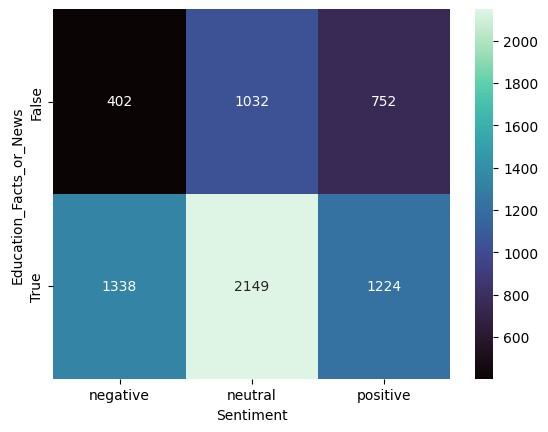

In [94]:
iv = "Sentiment"
dv = "Education_Facts_or_News"
full_chi_square(iv, dv)

Sentiment  negative  neutral  positive
Animals                               
False          1622     2969      1744
True            118      213       233

This is significant
Chi-squared: 48.1305746808427, p=3.5365394145801996e-11
Effect size: Cramer's V=0.0835251859417173


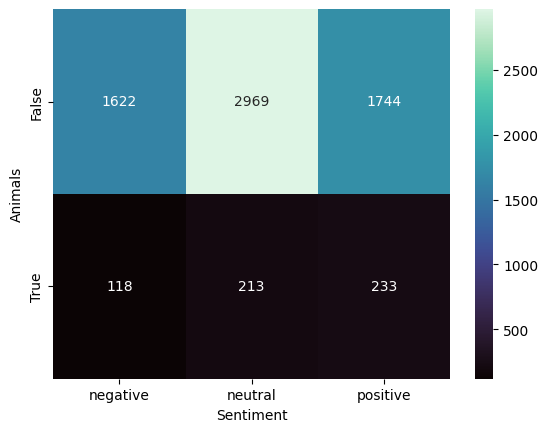

In [95]:
iv = "Sentiment"
dv = "Animals"
full_chi_square(iv, dv)

Sentiment  negative  neutral  positive
People                                
False           799     1095       874
True            941     2087      1103

This is significant
Chi-squared: 81.26463554115597, p=2.257400439686135e-18
Effect size: Cramer's V=0.10853197934629968


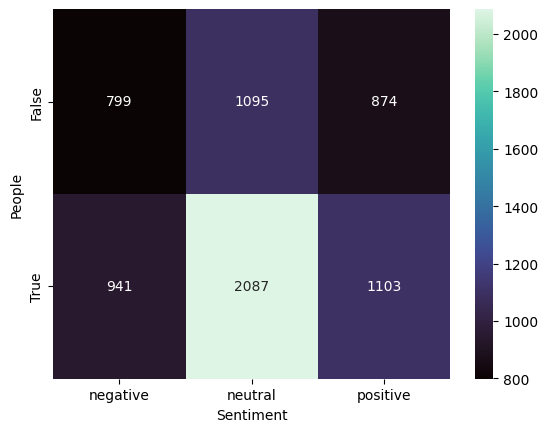

In [96]:
iv = "Sentiment"
dv = "People"
full_chi_square(iv, dv)

Sentiment  negative  neutral  positive
Nature                                
False          1218     2272      1174
True            522      910       803

This is significant
Chi-squared: 86.52497526044411, p=1.6268231684224417e-19
Effect size: Cramer's V=0.1119895938032937


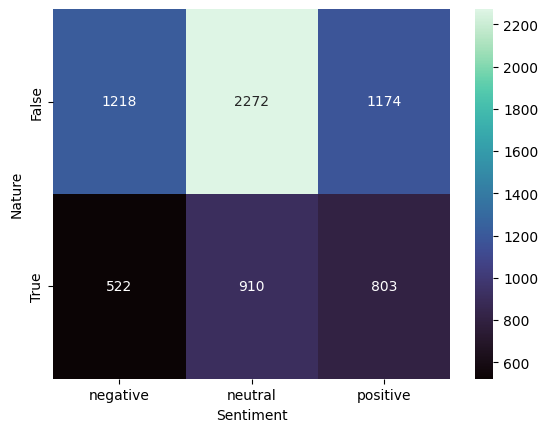

In [97]:
iv = "Sentiment"
dv = "Nature"
full_chi_square(iv, dv)

Sentiment          negative  neutral  positive
Natural_Disasters                             
False                  1443     2967      1879
True                    297      214        97

This is significant
Chi-squared: 202.2241340182327, p=1.2234528701230002e-44
Effect size: Cramer's V=0.1712325716505482


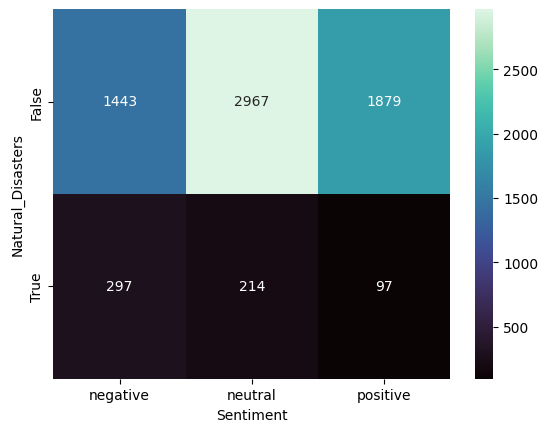

In [98]:
iv = "Sentiment"
dv = "Natural_Disasters"
full_chi_square(iv, dv)

Sentiment  negative  neutral  positive
Artifacts                             
False          1021     1973      1147
True            719     1209       830

This is significant
Chi-squared: 9.835729928571697, p=0.0073147313997715315
Effect size: Cramer's V=0.037758108071187575


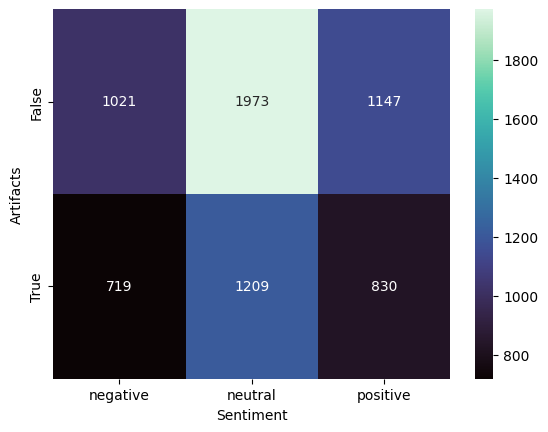

In [99]:
iv = "Sentiment"
dv = "Artifacts"
full_chi_square(iv, dv)

Sentiment                negative  neutral  positive
Impression_or_Sentiment                             
Negative                     1102     1024       389
Neutral                       585     1916       908
Positive                       53      241       679

This is significant
Chi-squared: 1502.619434709618, p=0.0
Effect size: Cramer's V=0.4667608132279368


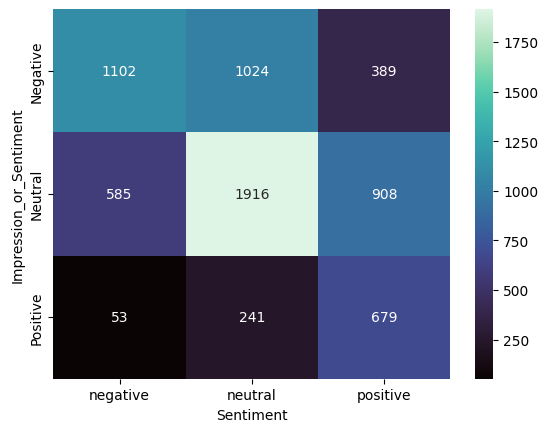

In [100]:
#just to check
iv = "Sentiment"
dv = "Impression_or_Sentiment"
full_chi_square(iv, dv)

Sentiment              negative  neutral  positive
Type_of_media_content                             
Diagram                      60       79        30
Drawing                      81      150        94
Photo                      1276     2314      1596
Text                        313      582       251
Video                        10       56         5

This is significant
Chi-squared: 82.79065079268992, p=1.3389887664868517e-14
Effect size: Cramer's V=0.10956214726707687


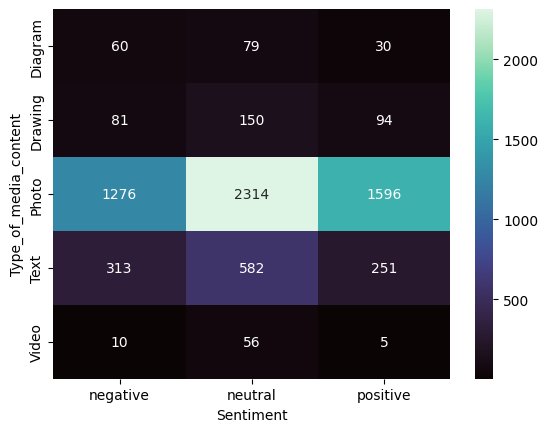

In [101]:
iv = "Sentiment"
dv = "Type_of_media_content"
full_chi_square(iv, dv)

Sentiment                                           negative  neutral  \
BERTopic                                                                
-1_klimawandel_klimaschutz_climatechange_klimak...       679     1215   
0_klimaschutz_klimawandel_klimakrise_climatechange       632     1305   
10_meat_fleisch_vegan_dairy                               16       24   
11_maui_wildfires_fires_canada                            15       22   
12_sunmoney_makemoney_makemoney savetheplanet_s...        10       19   
13_plastic_waste_plasticfree_savetheplanet                 4       19   
14_thunberg_greta_greta thunberg_gretathunberg            14       15   
15_amazonas_indigenous_regenwald_lula                     16       17   
16_lützerath_räumung_rwe_innen                            13       12   
17_trashmaid_thelittletrashmaid_mermaid_thelitt...         1       10   
18_wildlifephotographer_eleph ants7_eleph_ants7            0        9   
1_savetheplanet_pa_pa pa_viral                     

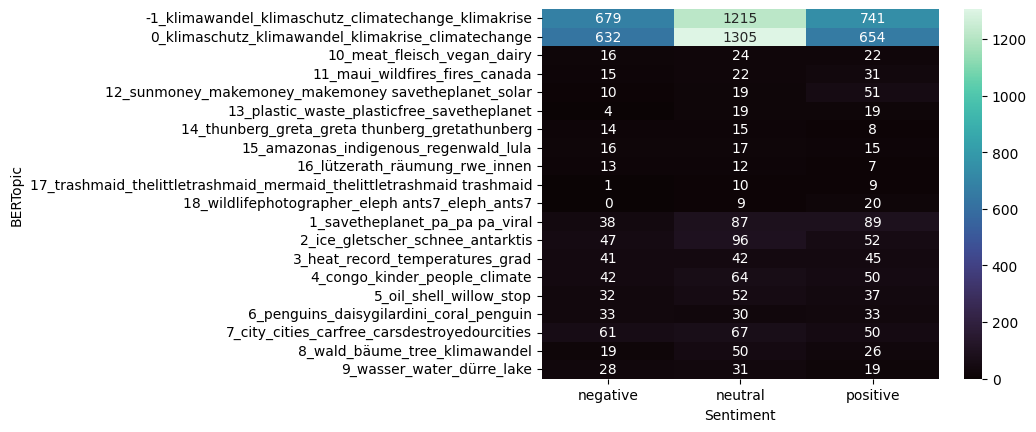

In [102]:
iv="Sentiment"
dv="BERTopic"
full_chi_square(iv,dv)

### Visual Sentiment and image content

Impression_or_Sentiment                             Negative  Neutral  \
BERTopic                                                                
-1_klimawandel_klimaschutz_climatechange_klimak...       978     1276   
0_klimaschutz_klimawandel_klimakrise_climatechange       925     1332   
10_meat_fleisch_vegan_dairy                               25       29   
11_maui_wildfires_fires_canada                            20       32   
12_sunmoney_makemoney_makemoney savetheplanet_s...        16       36   
13_plastic_waste_plasticfree_savetheplanet                12       19   
14_thunberg_greta_greta thunberg_gretathunberg            18       14   
15_amazonas_indigenous_regenwald_lula                     21       24   
16_lützerath_räumung_rwe_innen                            13       16   
17_trashmaid_thelittletrashmaid_mermaid_thelitt...         8        9   
18_wildlifephotographer_eleph ants7_eleph_ants7            6        7   
1_savetheplanet_pa_pa pa_viral                     

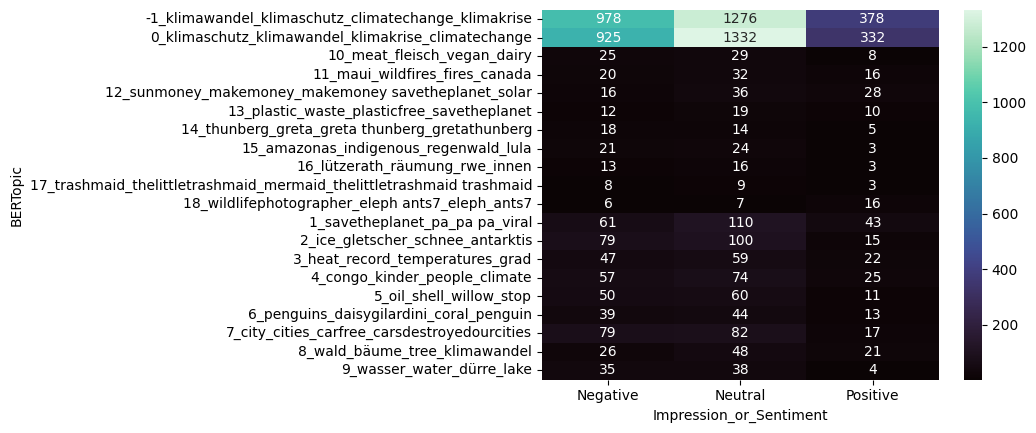

In [103]:
iv="Impression_or_Sentiment"
dv="BERTopic"
full_chi_square(iv,dv)

Impression_or_Sentiment  Negative  Neutral  Positive
Nature                                              
False                        1569     2624       469
True                          946      785       504

This is significant
Chi-squared: 335.0929779240835, p=1.719825490254342e-73
Effect size: Cramer's V=0.2204207879328721


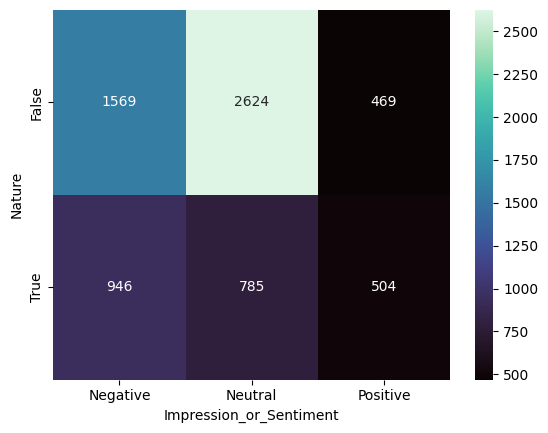

In [104]:
iv="Impression_or_Sentiment"
dv="Nature"
full_chi_square(iv,dv)

Impression_or_Sentiment  Negative  Neutral  Positive
Natural_Disasters                                   
False                        1934     3383       972
True                          581       26         1

This is significant
Chi-squared: 1005.4429486465754, p=4.686382872724952e-219
Effect size: Cramer's V=0.38181114686436524


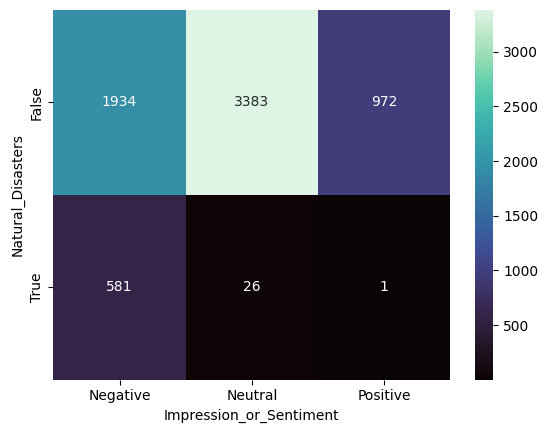

In [105]:
iv="Impression_or_Sentiment"
dv="Natural_Disasters"
full_chi_square(iv,dv)

Impression_or_Sentiment  Negative  Neutral  Positive
People                                              
False                        1293     1050       425
True                         1222     2359       548

This is significant
Chi-squared: 261.8136196121633, p=1.4057071623737495e-57
Effect size: Cramer's V=0.19483456420969555


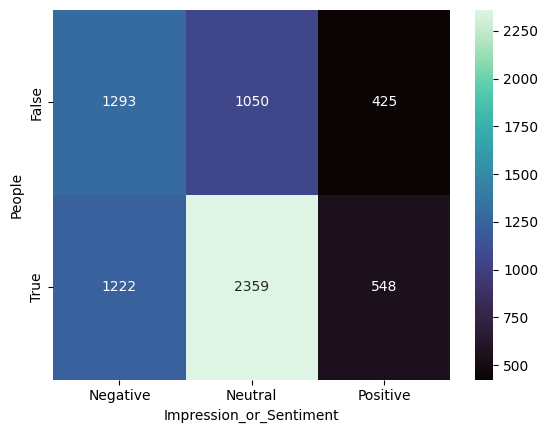

In [106]:
iv="Impression_or_Sentiment"
dv="People"
full_chi_square(iv,dv)

Impression_or_Sentiment  Negative  Neutral  Positive
Animals                                             
False                        2317     3185       831
True                          198      224       142

This is significant
Chi-squared: 65.38192273033661, p=6.345938676241707e-15
Effect size: Cramer's V=0.0973640724873866


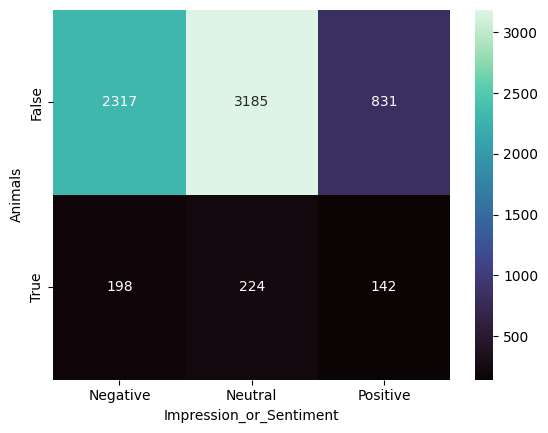

In [107]:
iv="Impression_or_Sentiment"
dv="Animals"
full_chi_square(iv,dv)

Impression_or_Sentiment  Negative  Neutral  Positive
Type_of_media_content                               
Diagram                        80       82         7
Drawing                       160      109        56
Photo                        1816     2567       803
Text                          436      609       101
Video                          23       42         6

This is significant
Chi-squared: 90.76987369650313, p=3.2446349760385863e-16
Effect size: Cramer's V=0.11472042640932627


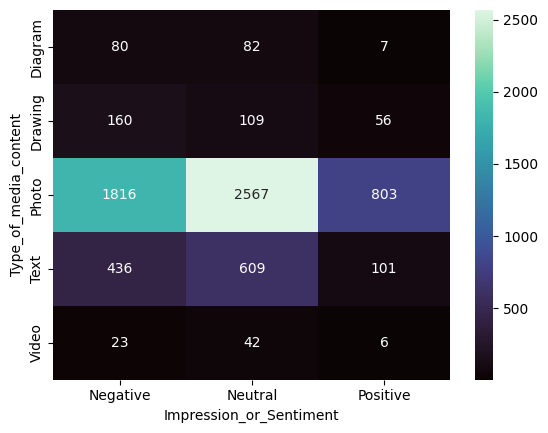

In [109]:
iv="Impression_or_Sentiment"
dv="Type_of_media_content"
full_chi_square(iv,dv)

Impression_or_Sentiment  Negative  Neutral  Positive
Education_Facts_or_News                             
False                         407     1377       402
True                         2108     2032       571

This is significant
Chi-squared: 440.26512540954633, p=2.4982893125101332e-96
Effect size: Cramer's V=0.25265449522079975


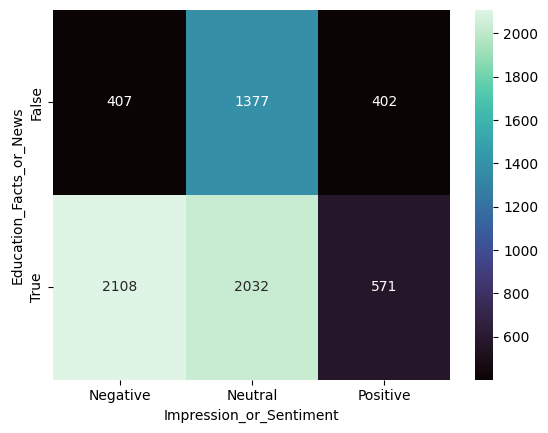

In [112]:
iv="Impression_or_Sentiment"
dv="Education_Facts_or_News"
full_chi_square(iv,dv)